# **DATA 3421: Final Project**

## **Byrnes Mulumbeni**
## **Laura Tambwe Mwibashiye**
## **Uyenmy Nguyen**

# **1. Download the file**

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("stealthtechnologies/predict-people-personality-types")

print("Path to dataset files:", path)

100%|██████████| 1.27M/1.27M [00:00<00:00, 95.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/stealthtechnologies/predict-people-personality-types/versions/3


In [ ]:
import os
import pandas as pd

# Path to the downloaded dataset
path = "/root/.cache/kagglehub/datasets/stealthtechnologies/predict-people-personality-types/versions/3"

# List the files in the directory to identify the dataset file
files = os.listdir(path)
print("Files in the directory:", files)

Files in the directory: ['data.csv']


# 2. **Exploratory Data Analysis**

## **A. Analysis of the Dataset**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file_path = path + "/data.csv"
df = pd.read_csv(file_path)
df.head(15)


,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,21.0,Female,1,5.89208,2.144395,7.32363,5.462224,Arts,ENTP
1,24.0,Female,1,2.48366,3.206188,8.06876,3.765012,Unknown,INTP
2,26.0,Female,1,7.02910,6.469302,4.16472,5.454442,Others,ESFP
3,30.0,Male,0,5.46525,4.179244,2.82487,5.080477,Sports,ENFJ
4,31.0,Female,0,3.59804,6.189259,5.31347,3.677984,Others,ISFP
5,33.0,Female,0,1.06869,7.143507,3.84411,6.347241,Sports,ISFJ
6,32.0,Female,0,6.29802,6.223903,7.90633,6.705588,Arts,ESTJ
7,27.0,Male,1,3.98957,4.406797,5.09055,5.556500,Technology,INFP
8,30.0,Male,0,1.55058,6.652428,0.57707,6.919573,Unknown,ISFJ
9,26.0,Female,1,7.02255,6.929234,9.49484,6.052261,Arts,ESTP


In [ ]:
df.to_csv('Initial_table.csv', index=False)

In [ ]:
## Missing values

df.isnull().sum()

,0
Age,0
Gender,0
Education,0
Introversion Score,0
Sensing Score,0
Thinking Score,0
Judging Score,0
Interest,0
Personality,0


In [ ]:
df.shape

(43744, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43744 entries, 0 to 43743
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 43744 non-null  float64
 1   Gender              43744 non-null  object 
 2   Education           43744 non-null  int64  
 3   Introversion Score  43744 non-null  float64
 4   Sensing Score       43744 non-null  float64
 5   Thinking Score      43744 non-null  float64
 6   Judging Score       43744 non-null  float64
 7   Interest            43744 non-null  object 
 8   Personality         43744 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 3.0+ MB


In [ ]:
df.describe()

,Age,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score
count,43744.000000,43744.000000,43744.000000,43744.000000,43744.000000,43744.000000
mean,27.437203,0.229014,4.588349,5.780074,5.419131,5.391041
std,4.893805,0.420203,2.902628,1.241648,2.900785,1.442413
min,18.000000,0.000000,0.000150,0.000000,0.000320,0.000000
25%,24.000000,0.000000,2.067020,4.953340,2.895750,4.511842
50%,27.000000,0.000000,4.261680,6.162928,5.769870,5.771635
75%,30.000000,0.000000,7.085002,6.622978,7.923503,6.409583
max,52.000000,1.000000,9.999920,9.803837,9.999770,10.000000


In [ ]:
# Distribution of Target feature
df['Personality'].value_counts()

,count
Personality,
ENTP,2734
INTP,2734
ESFP,2734
ENFJ,2734
ISFP,2734
ISFJ,2734
ESTJ,2734
INFP,2734
ESTP,2734


In [ ]:
df['Interest'].value_counts()

,count
Interest,
Unknown,15396
Arts,8450
Sports,7029
Others,6809
Technology,6060


## **B. Visualization & Correlation**

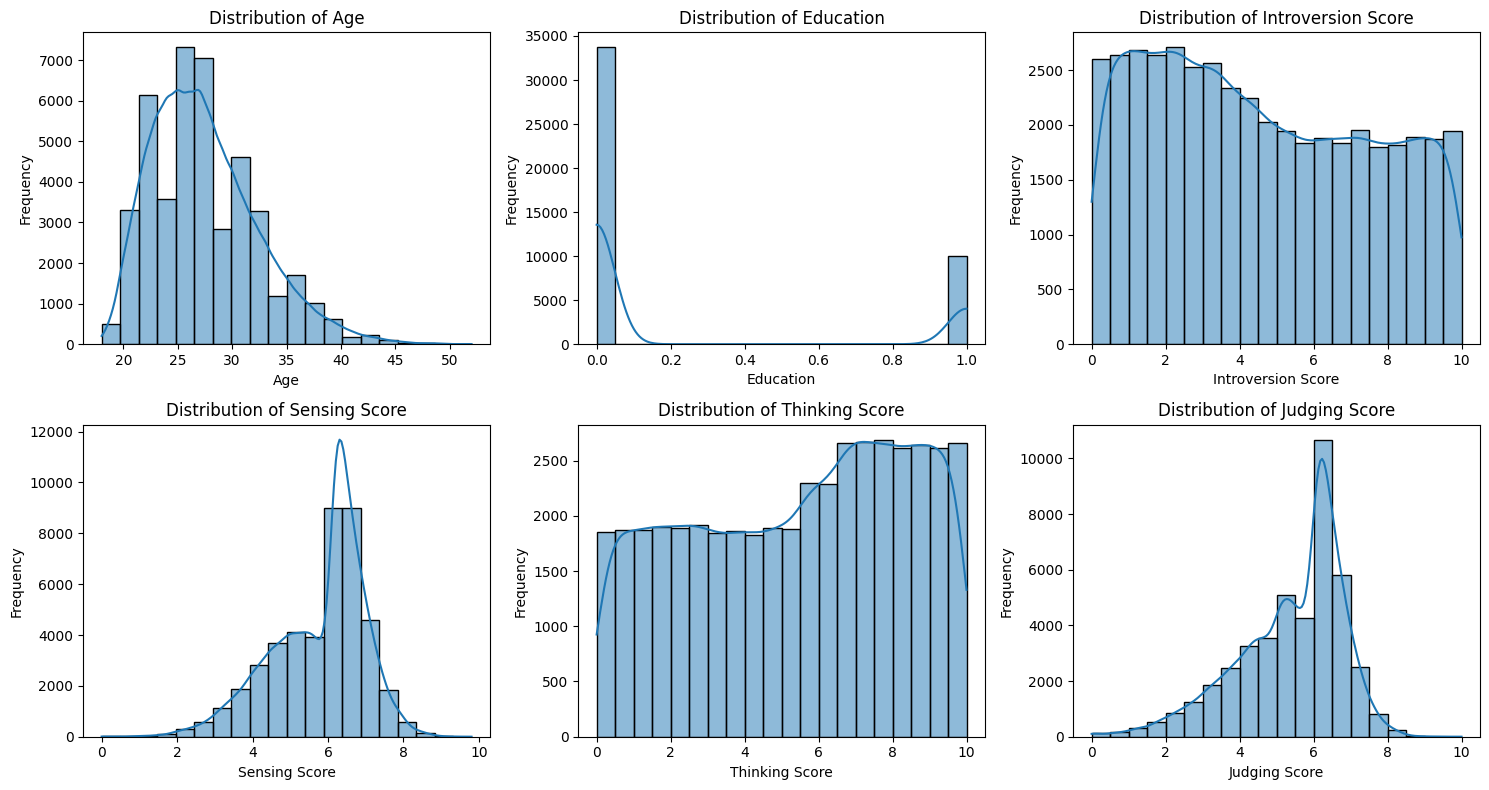

<Figure size 640x480 with 0 Axes>

In [ ]:
# Visualizing distributions for numerical features
numerical_features = ['Age', 'Education', 'Introversion Score', 'Sensing Score', 'Thinking Score', 'Judging Score']

# Plot histograms for each numerical feature
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(df[feature], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


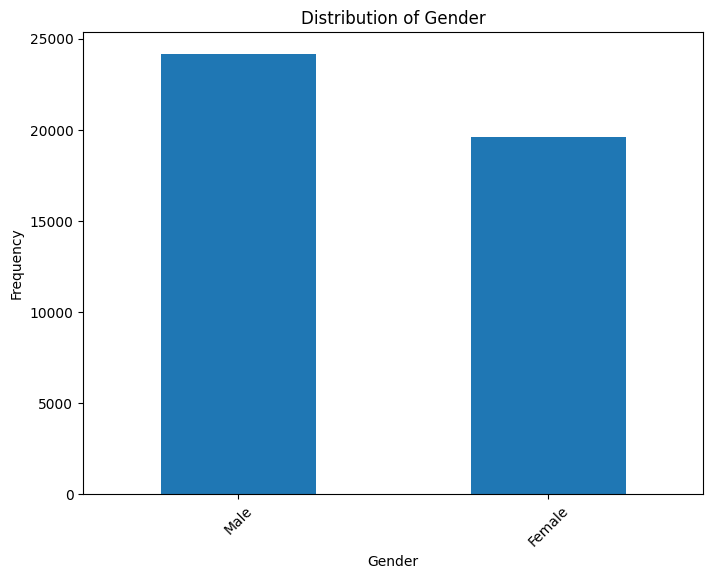

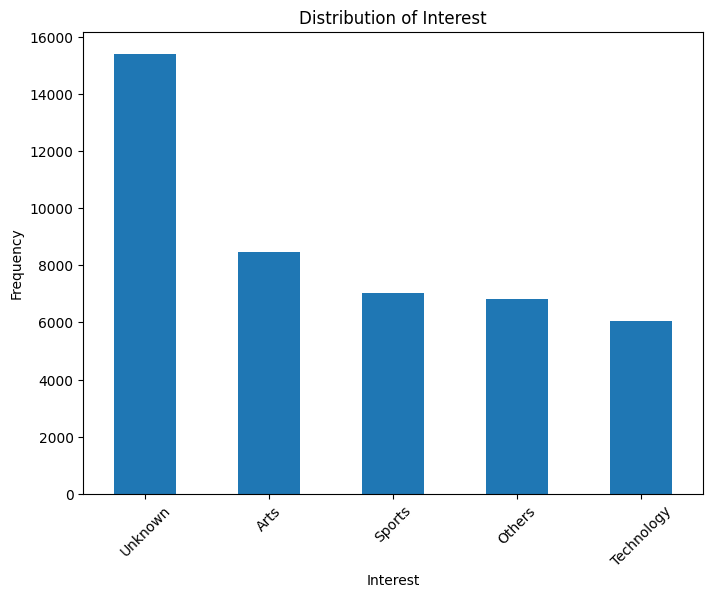

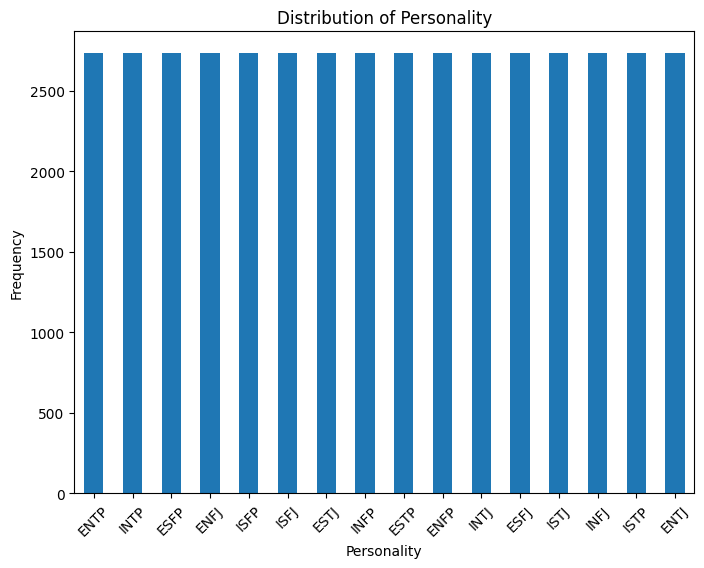

In [ ]:
# Visualizing distributions for categorical features
for column in df.columns:
    if df[column].dtype == 'object' or df[column].dtype.name == 'category':
        plt.figure(figsize=(8, 6))
        df[column].value_counts().plot(kind='bar')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)
        plt.show()

In [ ]:
correlation_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

correlation_matrix


,Age,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score
Age,1.000000,0.002236,-0.008814,0.166563,-0.001742,0.005590
Education,0.002236,1.000000,0.000930,-0.004769,0.003562,-0.307034
Introversion Score,-0.008814,0.000930,1.000000,-0.000116,-0.008502,0.004279
Sensing Score,0.166563,-0.004769,-0.000116,1.000000,0.010325,0.002179
Thinking Score,-0.001742,0.003562,-0.008502,0.010325,1.000000,0.001714
Judging Score,0.005590,-0.307034,0.004279,0.002179,0.001714,1.000000


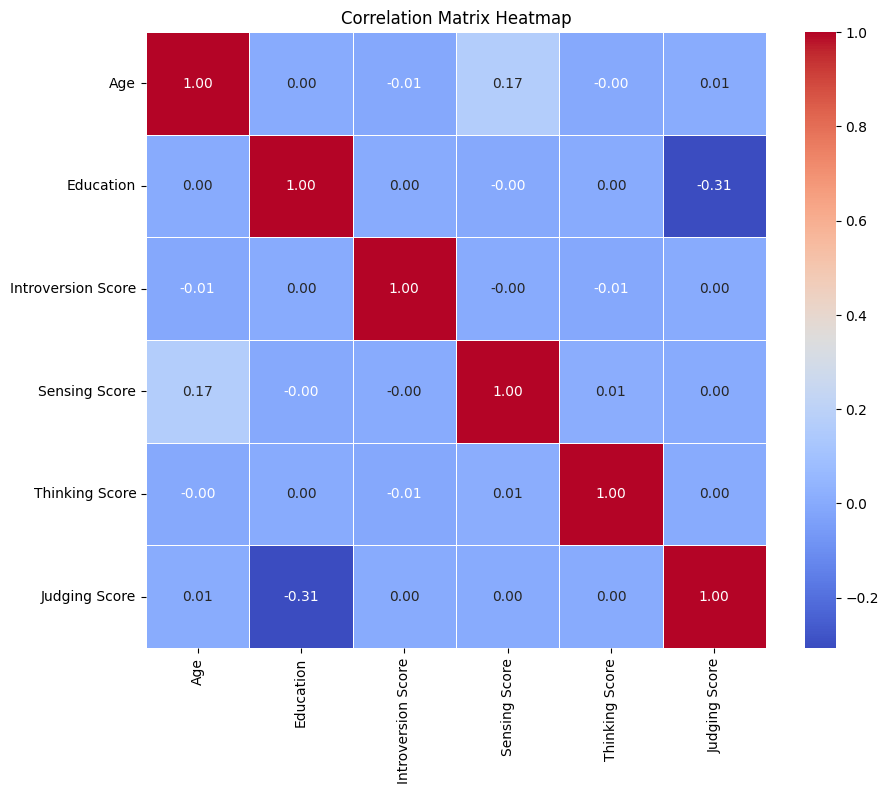

In [ ]:
# Heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

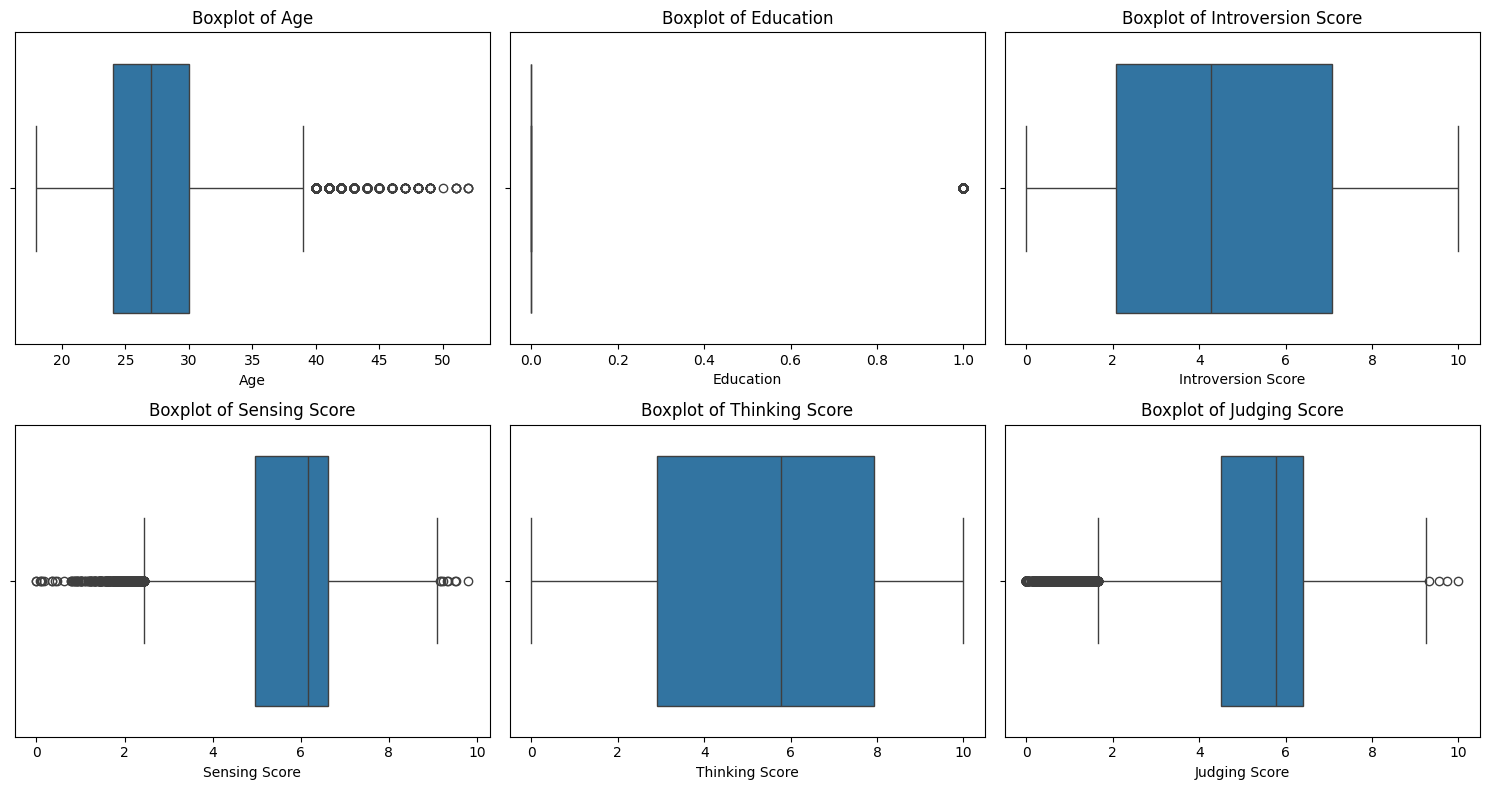

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

## **C. Baseline Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, f1_score, recall_score

X = df.drop(columns=['Personality'])
y = df['Personality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Dummy Classifier (Base Model)
dummy_model = DummyClassifier(strategy="stratified")
dummy_model.fit(X_train, y_train)
y_pred_dummy = dummy_model.predict(X_test)

# Calculate evaluation metrics for Dummy Classifier
accuracy_dummy = accuracy_score(y_test, y_pred_dummy)
precision_dummy = precision_score(y_test, y_pred_dummy, average='weighted')
recall_dummy = recall_score(y_test, y_pred_dummy, average='weighted')
f1_dummy = f1_score(y_test, y_pred_dummy, average='weighted')

dummy_result = {
    'Model': 'Dummy Classifier',
    'Stage': 'Base Models',
    'Accuracy': accuracy_dummy,
    'Precision': precision_dummy,
    'Recall': recall_dummy,
    'F1-Score': f1_dummy
}

dummy_result

{'Model': 'Dummy Classifier',
 'Stage': 'Base Models',
 'Accuracy': 0.06412161389873128,
 'Precision': 0.06405733831917515,
 'Recall': 0.06412161389873128,
 'F1-Score': 0.06400241618228639}

In [ ]:
dummy_clf = DummyClassifier(strategy='uniform', random_state=42)

dummy_clf.fit(X_train, y_train)

y_pred = dummy_clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Dummy Classifier: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy of the Dummy Classifier: 0.06
Classification Report:
              precision    recall  f1-score   support

           0       0.05      0.06      0.05       531
           1       0.08      0.08      0.08       517
           2       0.06      0.06      0.06       559
           3       0.07      0.07      0.07       571
           4       0.05      0.06      0.06       532
           5       0.07      0.07      0.07       547
           6       0.04      0.04      0.04       588
           7       0.07      0.07      0.07       555
           8       0.07      0.07      0.07       540
           9       0.05      0.05      0.05       558
          10       0.05      0.05      0.05       550
          11       0.07      0.07      0.07       551
          12       0.06      0.06      0.06       574
          13       0.07      0.07      0.07       513
          14       0.06      0.06      0.06       509
          15       0.07      0.06      0.07       554

    accuracy      

# **3. Data Preprocessing**

## **A. Label encoding**

We first applied label encoding to convert categorical values into numerical form. We chose to stick with label encoding because our models can handle ordinal data. One-hot encoding was avoided to prevent a large increase in the number of features, which could slow down training and increase memory usage.

In [ ]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

df.head()


,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,21.0,1,1,5.89208,2.144395,7.32363,5.462224,Arts,ENTP
1,24.0,1,1,2.48366,3.206188,8.06876,3.765012,Unknown,INTP
2,26.0,1,1,7.02910,6.469302,4.16472,5.454442,Others,ESFP
3,30.0,0,0,5.46525,4.179244,2.82487,5.080477,Sports,ENFJ
4,31.0,1,0,3.59804,6.189259,5.31347,3.677984,Others,ISFP


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Personality'] = label_encoder.fit_transform(df['Personality'])

print(df['Personality'].head())


0     3
1    11
2     5
3     0
4    13
Name: Personality, dtype: int64


In [ ]:
label_encoder = LabelEncoder()

df['Interest'] = label_encoder.fit_transform(df['Interest'])

print(df['Interest'].head())

0    0
1    4
2    1
3    2
4    1
Name: Interest, dtype: int64


In [ ]:
df.head(15)

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,21.0,1,1,5.89208,2.144395,7.32363,5.462224,0,3
1,24.0,1,1,2.48366,3.206188,8.06876,3.765012,4,11
2,26.0,1,1,7.02910,6.469302,4.16472,5.454442,1,5
3,30.0,0,0,5.46525,4.179244,2.82487,5.080477,2,0
4,31.0,1,0,3.59804,6.189259,5.31347,3.677984,1,13
5,33.0,1,0,1.06869,7.143507,3.84411,6.347241,2,12
6,32.0,1,0,6.29802,6.223903,7.90633,6.705588,0,6
7,27.0,0,1,3.98957,4.406797,5.09055,5.556500,3,9
8,30.0,0,0,1.55058,6.652428,0.57707,6.919573,4,12
9,26.0,1,1,7.02255,6.929234,9.49484,6.052261,0,7


## **B. Models Selection**

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix



X = df.drop(columns=['Personality'])
y = df['Personality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_normalized = scaler.fit_transform(X)


In [ ]:
# List of models to evaluate
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Evaluate each model using cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X_normalized, y, cv=5, scoring='accuracy')
    print(f'{name} - Mean Accuracy: {scores.mean():.4f} ± {scores.std():.4f}')



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression - Mean Accuracy: 0.7806 ± 0.0033
KNN - Mean Accuracy: 0.7388 ± 0.0055
Decision Tree - Mean Accuracy: 0.8656 ± 0.0047
Random Forest - Mean Accuracy: 0.8983 ± 0.0043
SVM - Mean Accuracy: 0.8135 ± 0.0039


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:02:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:02:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:02:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:03:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:03:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost - Mean Accuracy: 0.8928 ± 0.0040
Gradient Boosting - Mean Accuracy: 0.8992 ± 0.0027


In [ ]:
# List of models to evaluate
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Evaluate each model using cross-validation
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(f'{name} - Mean Accuracy: {scores.mean():.4f} ± {scores.std():.4f}')



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression - Mean Accuracy: 0.6538 ± 0.0038
KNN - Mean Accuracy: 0.7016 ± 0.0061
Decision Tree - Mean Accuracy: 0.8668 ± 0.0035
Random Forest - Mean Accuracy: 0.8988 ± 0.0046
SVM - Mean Accuracy: 0.7420 ± 0.0030


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:04:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:04:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:05:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:05:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:05:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost - Mean Accuracy: 0.8926 ± 0.0039
Gradient Boosting - Mean Accuracy: 0.8991 ± 0.0031


In [ ]:
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
gbm = GradientBoostingClassifier(random_state=42)

# Train and evaluate Decision Tree
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Calculate evaluation metrics for Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

# Store the Decision Tree results
dt_result = {
    'Model': 'Decision Tree',
    'Accuracy': accuracy_dt,
    'Precision': precision_dt,
    'Recall': recall_dt,
    'F1-Score': f1_dt
}

# Evaluate Random Forest
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Calculate evaluation metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Store the Random Forest results
rf_result = {
    'Model': 'Random Forest',
    'Accuracy': accuracy_rf,
    'Precision': precision_rf,
    'Recall': recall_rf,
    'F1-Score': f1_rf
}

# Evaluate XGBoost
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Calculate evaluation metrics for XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')

# Store the XGBoost results
xgb_result = {
    'Model': 'XGBoost',
    'Accuracy': accuracy_xgb,
    'Precision': precision_xgb,
    'Recall': recall_xgb,
    'F1-Score': f1_xgb
}

# Evaluate Gradient Boosting
gbm.fit(X_train, y_train)
y_pred_gbm = gbm.predict(X_test)

# Calculate evaluation metrics for Gradient Boosting
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
precision_gbm = precision_score(y_test, y_pred_gbm, average='weighted')
recall_gbm = recall_score(y_test, y_pred_gbm, average='weighted')
f1_gbm = f1_score(y_test, y_pred_gbm, average='weighted')

# Store the Gradient Boosting results
gbm_result = {
    'Model': 'Gradient Boosting',
    'Accuracy': accuracy_gbm,
    'Precision': precision_gbm,
    'Recall': recall_gbm,
    'F1-Score': f1_gbm
}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:57:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
dt_result = pd.DataFrame([dt_result])

dt_result

,Model,Accuracy,Precision,Recall,F1-Score
0,Decision Tree,0.862041,0.862336,0.862041,0.862038


In [ ]:
rf_result = pd.DataFrame([rf_result])
rf_result

,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest,0.901817,0.902844,0.901817,0.901835


In [ ]:
xgb_result

{'Model': 'XGBoost',
 'Accuracy': 0.8935878386101269,
 'Precision': 0.8943624191481694,
 'Recall': 0.8935878386101269,
 'F1-Score': 0.8935950834116065}

In [ ]:
gbm_result = pd.DataFrame([gbm_result])
gbm_result

,Model,Accuracy,Precision,Recall,F1-Score
0,Gradient Boosting,0.903075,0.904046,0.903075,0.903084


In [ ]:
{
    'Model': 'Decision Tree',
    'Accuracy': accuracy_dt,
    'Precision': precision_dt,
    'Recall': recall_dt,
    'F1-Score': f1_dt
}


{'Model': 'Decision Tree',
 'Accuracy': 0.8620413761572752,
 'Precision': 0.8623361796201431,
 'Recall': 0.8620413761572752,
 'F1-Score': 0.8620382760155795}

In [ ]:
# List to store the results for each model
results_list = []

# Collect results for each model and append to the list
dt_result = {
    'Model': 'Decision Tree',
    'Accuracy': accuracy_dt,
    'Precision': precision_dt,
    'Recall': recall_dt,
    'F1-Score': f1_dt
}

rf_result = {
    'Model': 'Random Forest',
    'Accuracy': accuracy_rf,
    'Precision': precision_rf,
    'Recall': recall_rf,
    'F1-Score': f1_rf
}

xgb_result = {
    'Model': 'XGBoost',
    'Accuracy': accuracy_xgb,
    'Precision': precision_xgb,
    'Recall': recall_xgb,
    'F1-Score': f1_xgb
}

gbm_result = {
    'Model': 'Gradient Boosting',
    'Accuracy': accuracy_gbm,
    'Precision': precision_gbm,
    'Recall': recall_gbm,
    'F1-Score': f1_gbm
}

# Append all results to the list
results_list.extend([dt_result, rf_result, xgb_result, gbm_result])

results_df = pd.DataFrame(results_list)

results_df


,Model,Accuracy,Precision,Recall,F1-Score
0,Decision Tree,0.862041,0.862336,0.862041,0.862038
1,Random Forest,0.901817,0.902844,0.901817,0.901835
2,XGBoost,0.893588,0.894362,0.893588,0.893595
3,Gradient Boosting,0.903075,0.904046,0.903075,0.903084


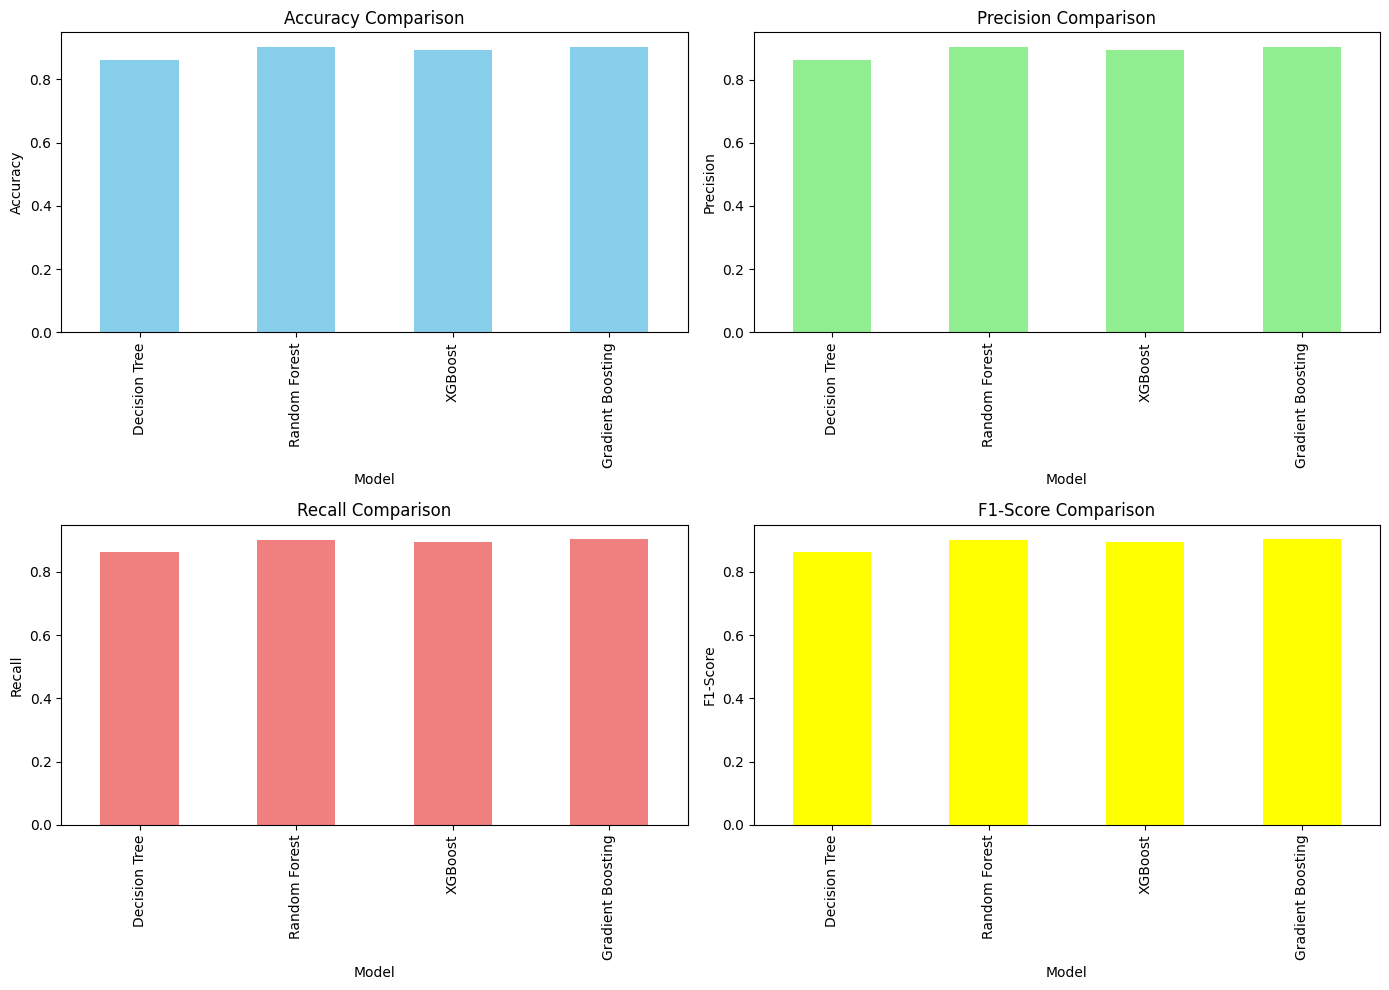

In [ ]:
# Plot the metrics for comparison
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Accuracy Bar Plot
results_df.set_index('Model')['Accuracy'].plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Accuracy Comparison')
axes[0, 0].set_ylabel('Accuracy')

# Precision Bar Plot
results_df.set_index('Model')['Precision'].plot(kind='bar', ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Precision Comparison')
axes[0, 1].set_ylabel('Precision')

# Recall Bar Plot
results_df.set_index('Model')['Recall'].plot(kind='bar', ax=axes[1, 0], color='lightcoral')
axes[1, 0].set_title('Recall Comparison')
axes[1, 0].set_ylabel('Recall')

# F1-Score Bar Plot
results_df.set_index('Model')['F1-Score'].plot(kind='bar', ax=axes[1, 1], color='yellow')
axes[1, 1].set_title('F1-Score Comparison')
axes[1, 1].set_ylabel('F1-Score')

plt.tight_layout()
plt.show()


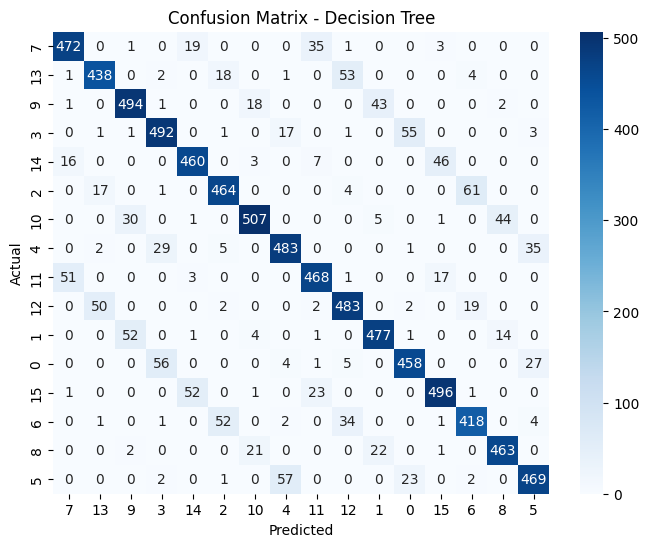

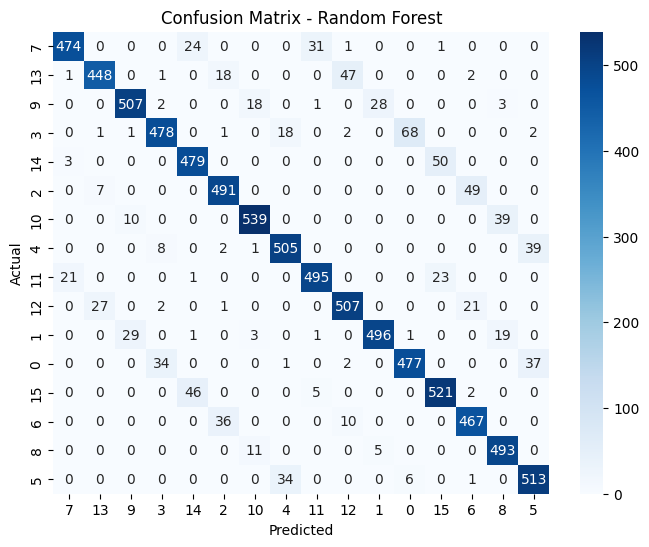

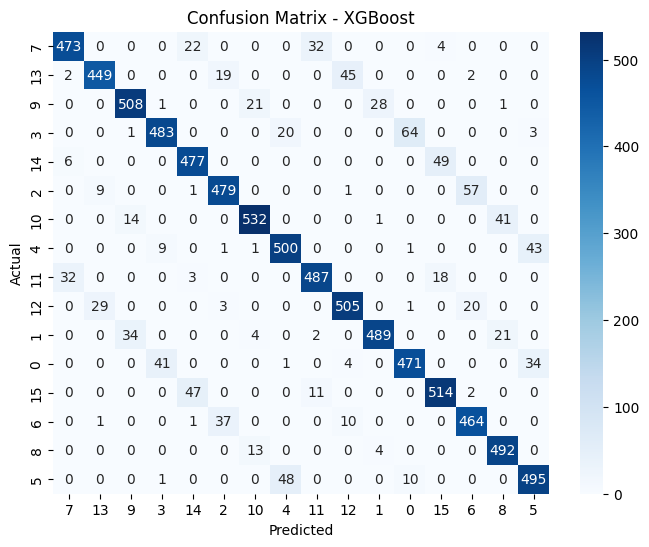

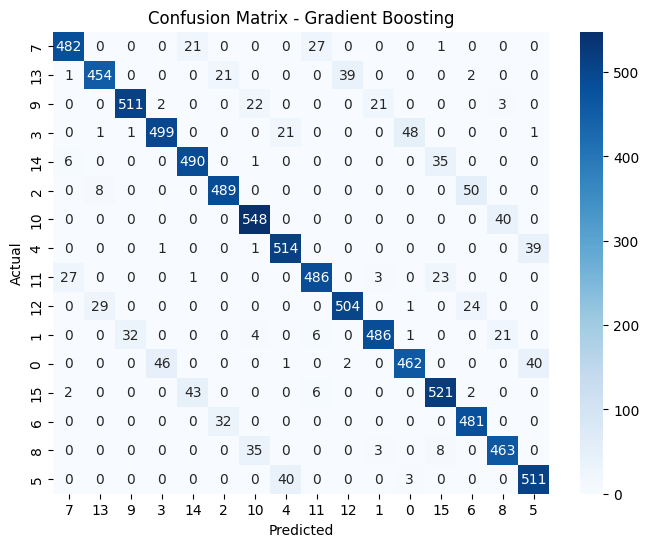

In [ ]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, model_name):
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=y_test.unique(), yticklabels=y_test.unique())
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix(y_test, y_pred_dt, 'Decision Tree')
plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest')
plot_confusion_matrix(y_test, y_pred_xgb, 'XGBoost')
plot_confusion_matrix(y_test, y_pred_gbm, 'Gradient Boosting')


## **C. Handling Outliers**

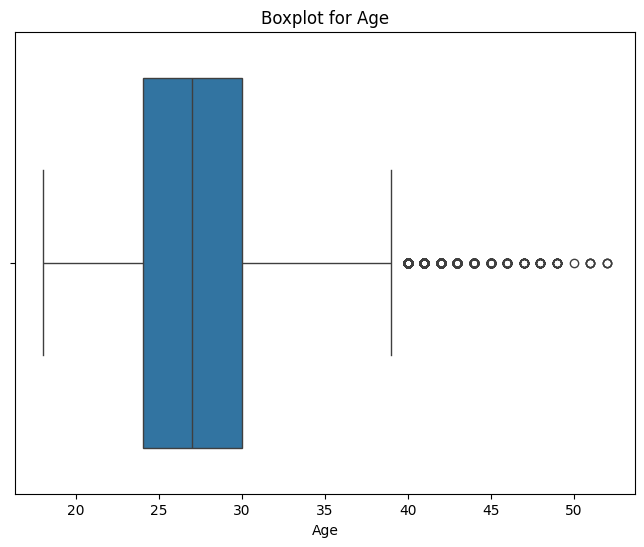

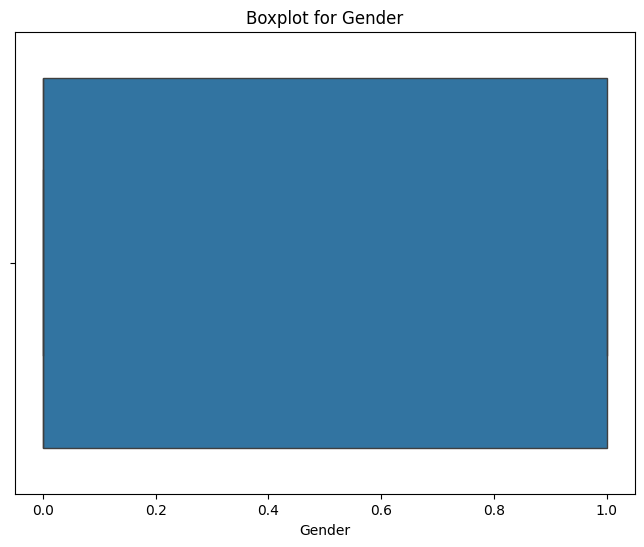

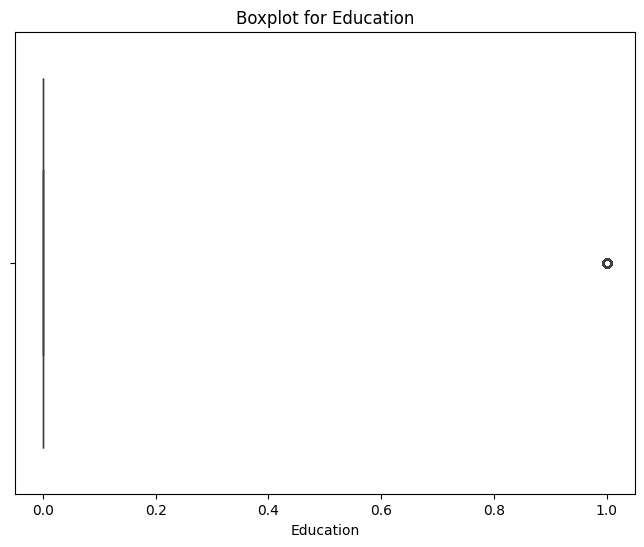

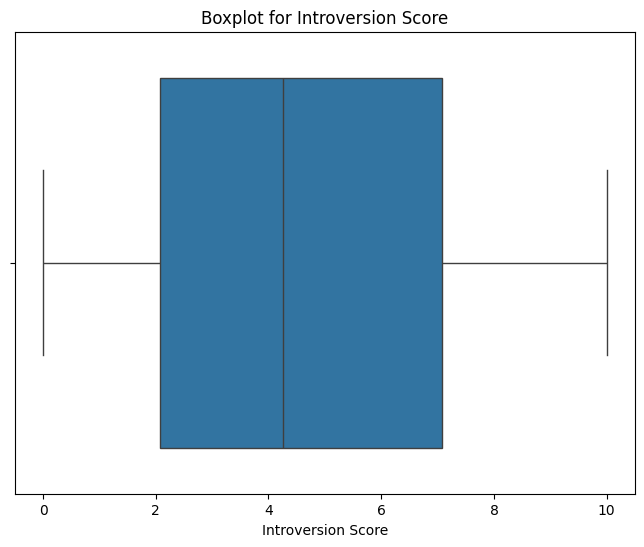

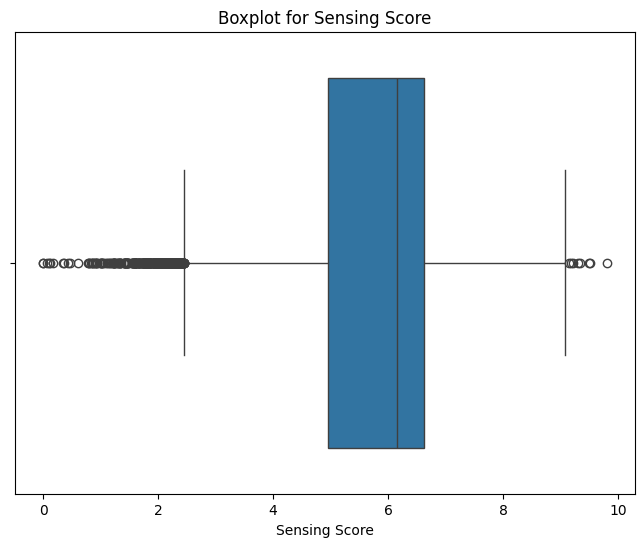

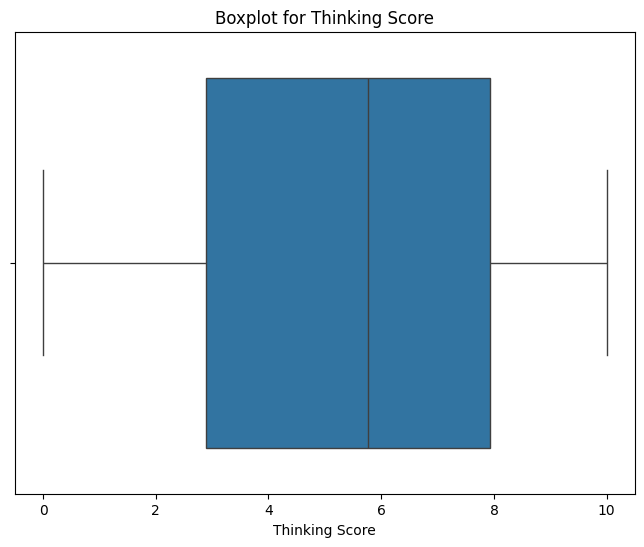

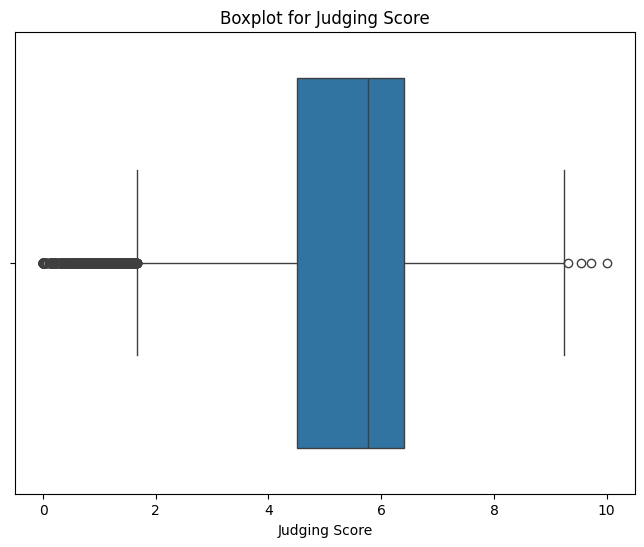

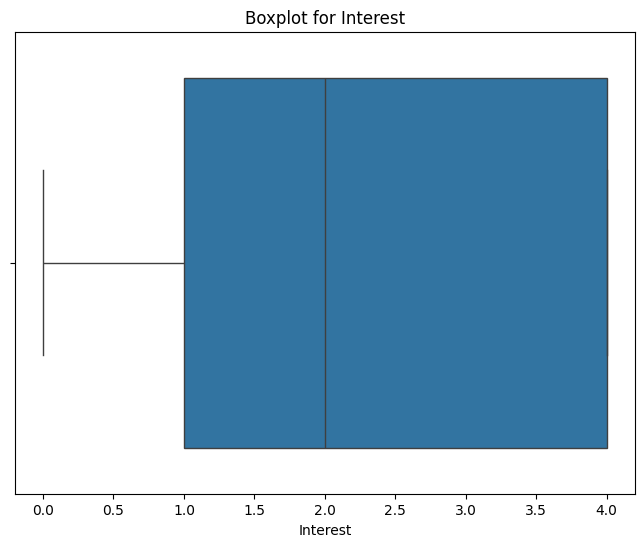

In [ ]:
for feature in X:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot for {feature}')
    plt.show()


In [ ]:
# Calculate IQR for each numerical column
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = (X < lower_bound) | (X > upper_bound)

outlier_counts = outliers.sum()
print("Outlier Counts per Feature:")
outlier_counts


Outlier Counts per Feature:


,0
Age,866
Gender,0
Education,10018
Introversion Score,0
Sensing Score,472
Thinking Score,0
Judging Score,735
Interest,0


In [ ]:
# Apply log transformation to features (values > 0)
X_transformed = X.copy()

for feature in X.columns:
    X_transformed[feature] = X_transformed[feature].apply(lambda x: np.log(x + 1) if x > 0 else x)

X_transformed.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest
0,3.091042,0.693147,0.693147,1.930373,1.145621,2.119098,1.865974,0.000000
1,3.218876,0.693147,0.693147,1.248083,1.436557,2.204836,1.561300,1.609438
2,3.295837,0.693147,0.693147,2.083072,2.010802,1.641851,1.864769,0.693147
3,3.433987,0.000000,0.000000,1.866442,1.644659,1.341524,1.805083,1.098612
4,3.465736,0.693147,0.000000,1.525630,1.972588,1.842685,1.542867,0.693147


## **D. Second Models: After handling outliers**

In [ ]:
# Split the dataset with outliers removed (X_no_outliers) into training and testing sets (80% train, 20% test)
X_train_no_outliers, X_test_no_outliers, y_train, y_test = train_test_split(
    X_transformed, y, test_size=0.2, random_state=42)

# Initialize the models
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
gbm = GradientBoostingClassifier(random_state=42)

# Evaluate Decision Tree
dt.fit(X_train_no_outliers, y_train)
y_pred_dt = dt.predict(X_test_no_outliers)

# Calculate evaluation metrics for Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

# Store the Decision Tree results
dt_result_no_outliers = {
    'Model': 'Decision Tree',
    'Accuracy': accuracy_dt,
    'Precision': precision_dt,
    'Recall': recall_dt,
    'F1-Score': f1_dt
}

# Evaluate Random Forest
rf.fit(X_train_no_outliers, y_train)
y_pred_rf = rf.predict(X_test_no_outliers)

# Calculate evaluation metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Store the Random Forest results
rf_result_no_outliers = {
    'Model': 'Random Forest',
    'Accuracy': accuracy_rf,
    'Precision': precision_rf,
    'Recall': recall_rf,
    'F1-Score': f1_rf
}

# Evaluate XGBoost
xgb_model.fit(X_train_no_outliers, y_train)
y_pred_xgb = xgb_model.predict(X_test_no_outliers)

# Calculate evaluation metrics for XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')

# Store the XGBoost results
xgb_result_no_outliers = {
    'Model': 'XGBoost',
    'Accuracy': accuracy_xgb,
    'Precision': precision_xgb,
    'Recall': recall_xgb,
    'F1-Score': f1_xgb
}

# Evaluate Gradient Boosting
gbm.fit(X_train_no_outliers, y_train)
y_pred_gbm = gbm.predict(X_test_no_outliers)

# Calculate evaluation metrics for Gradient Boosting
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
precision_gbm = precision_score(y_test, y_pred_gbm, average='weighted')
recall_gbm = recall_score(y_test, y_pred_gbm, average='weighted')
f1_gbm = f1_score(y_test, y_pred_gbm, average='weighted')

# Store the Gradient Boosting results
gbm_result_no_outliers = {
    'Model': 'Gradient Boosting',
    'Accuracy': accuracy_gbm,
    'Precision': precision_gbm,
    'Recall': recall_gbm,
    'F1-Score': f1_gbm
}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:00:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
results_list_no_outliers = [
    dt_result_no_outliers,
    rf_result_no_outliers,
    xgb_result_no_outliers,
    gbm_result_no_outliers
]

results_df_no_outliers = pd.DataFrame(results_list_no_outliers)

results_df_no_outliers


,Model,Accuracy,Precision,Recall,F1-Score
0,Decision Tree,0.862270,0.862550,0.862270,0.862262
1,Random Forest,0.901817,0.902882,0.901817,0.901828
2,XGBoost,0.891416,0.892287,0.891416,0.891450
3,Gradient Boosting,0.902732,0.903678,0.902732,0.902744


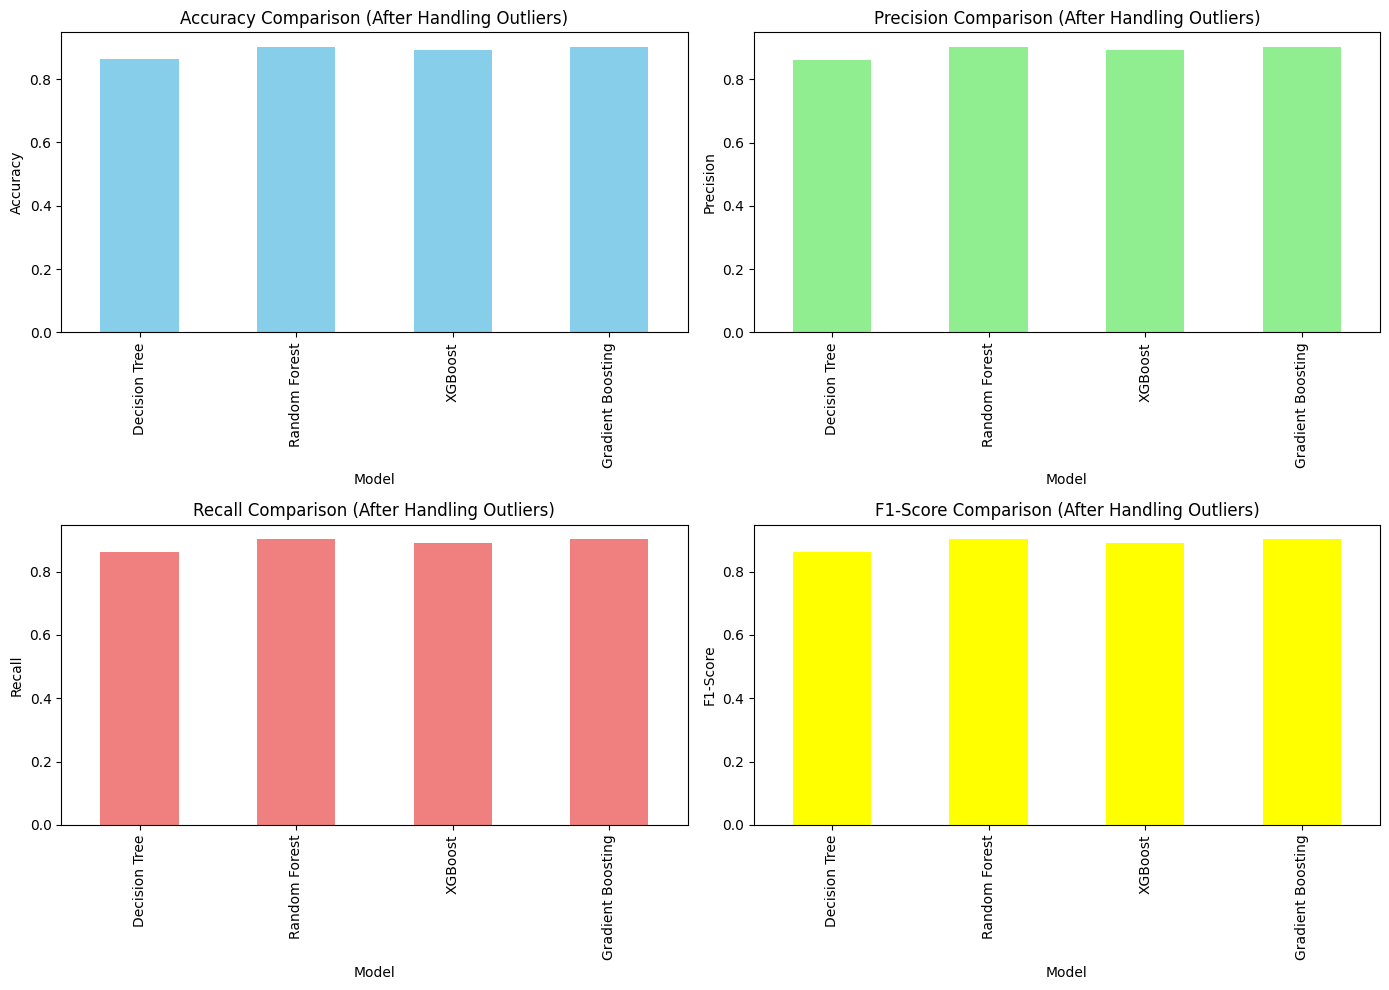

In [ ]:
# Plot the metrics for comparison after handling outliers
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Accuracy Bar Plot
results_df_no_outliers.set_index('Model')['Accuracy'].plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Accuracy Comparison (After Handling Outliers)')
axes[0, 0].set_ylabel('Accuracy')

# Precision Bar Plot
results_df_no_outliers.set_index('Model')['Precision'].plot(kind='bar', ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Precision Comparison (After Handling Outliers)')
axes[0, 1].set_ylabel('Precision')

# Recall Bar Plot
results_df_no_outliers.set_index('Model')['Recall'].plot(kind='bar', ax=axes[1, 0], color='lightcoral')
axes[1, 0].set_title('Recall Comparison (After Handling Outliers)')
axes[1, 0].set_ylabel('Recall')

# F1-Score Bar Plot
results_df_no_outliers.set_index('Model')['F1-Score'].plot(kind='bar', ax=axes[1, 1], color='yellow')
axes[1, 1].set_title('F1-Score Comparison (After Handling Outliers)')
axes[1, 1].set_ylabel('F1-Score')

plt.tight_layout()
plt.show()


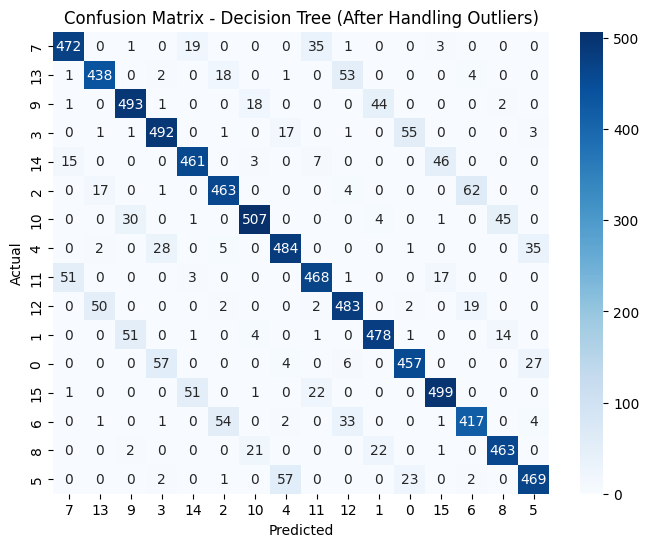

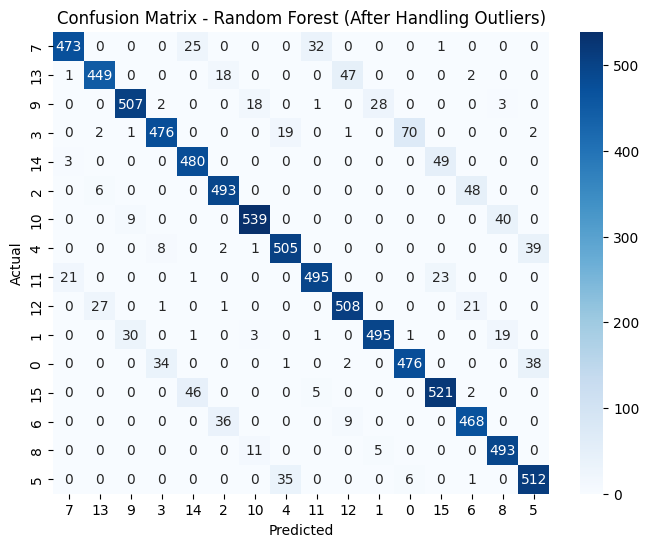

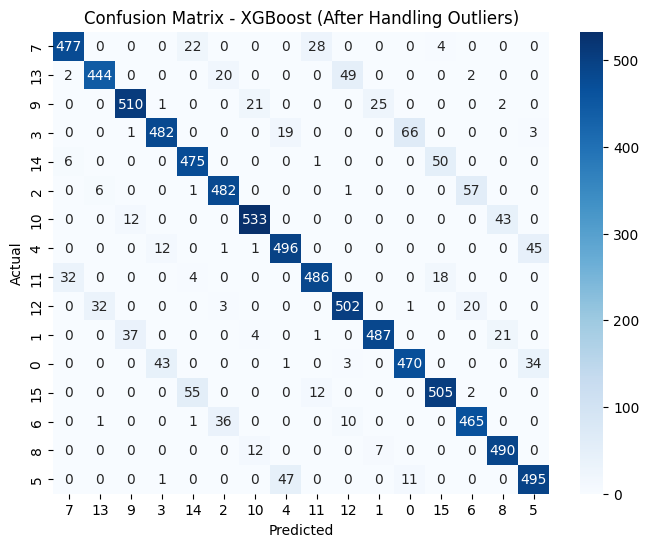

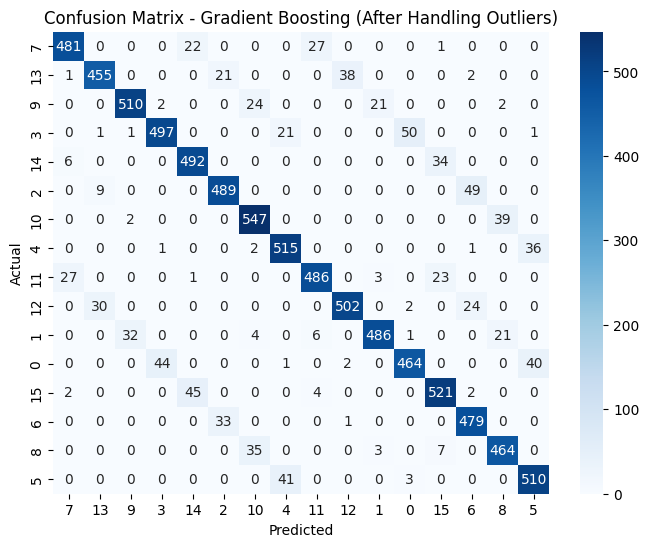

In [ ]:
def plot_confusion_matrix_no_outliers(y_test, y_pred, model_name):
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=y_test.unique(), yticklabels=y_test.unique())
    plt.title(f'Confusion Matrix - {model_name} (After Handling Outliers)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

plot_confusion_matrix_no_outliers(y_test, dt.predict(X_test_no_outliers), 'Decision Tree')
plot_confusion_matrix_no_outliers(y_test, rf.predict(X_test_no_outliers), 'Random Forest')
plot_confusion_matrix_no_outliers(y_test, xgb_model.predict(X_test_no_outliers), 'XGBoost')
plot_confusion_matrix_no_outliers(y_test, gbm.predict(X_test_no_outliers), 'Gradient Boosting')


## **E. Feature Selection & Multicollinearity Handling**

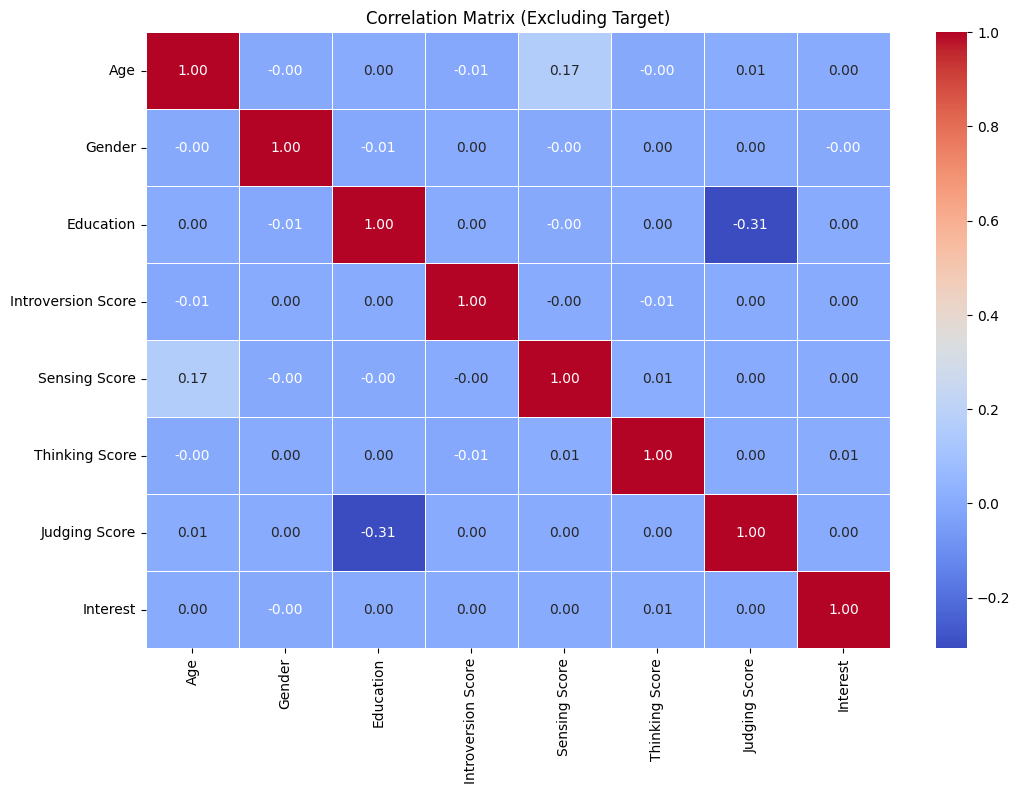

In [ ]:
X = df.drop(columns=['Personality'])

correlation_matrix = X.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix (Excluding Target)')
plt.show()


In [ ]:
model = RandomForestClassifier(random_state=42)

model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
# Feature importance
importances = model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df


,Feature,Importance
3,Introversion Score,0.228210
5,Thinking Score,0.218731
4,Sensing Score,0.192891
6,Judging Score,0.192414
7,Interest,0.052081
0,Age,0.051050
2,Education,0.047522
1,Gender,0.017101


<Figure size 1000x600 with 0 Axes>

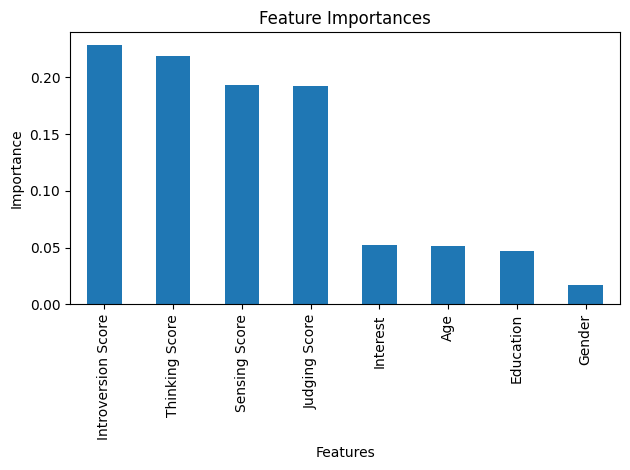

In [ ]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
feature_importance_df.plot(kind='bar', x='Feature', y='Importance', legend=False)
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
new_df = df.drop(columns=['Interest', 'Age', 'Education', 'Gender'])
new_df.head()

,Introversion Score,Sensing Score,Thinking Score,Judging Score,Personality
0,5.89208,2.144395,7.32363,5.462224,3
1,2.48366,3.206188,8.06876,3.765012,11
2,7.02910,6.469302,4.16472,5.454442,5
3,5.46525,4.179244,2.82487,5.080477,0
4,3.59804,6.189259,5.31347,3.677984,13


In [ ]:
new_X = new_df.drop(columns=['Personality'])
new_y = new_df['Personality']


In [ ]:
X_train_selected, X_test_selected, y_train, y_test = train_test_split(
    new_X, new_y, test_size=0.2, random_state=42)

# Initialize the models
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
gbm = GradientBoostingClassifier(random_state=42)

# Evaluate Decision Tree
dt.fit(X_train_selected, y_train)
y_pred_dt = dt.predict(X_test_selected)

# Calculate evaluation metrics for Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

# Store the Decision Tree results
dt_result_selected = {
    'Model': 'Decision Tree',
    'Accuracy': accuracy_dt,
    'Precision': precision_dt,
    'Recall': recall_dt,
    'F1-Score': f1_dt
}

# Evaluate Random Forest
rf.fit(X_train_selected, y_train)
y_pred_rf = rf.predict(X_test_selected)

# Calculate evaluation metrics for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Store the Random Forest results
rf_result_selected = {
    'Model': 'Random Forest',
    'Accuracy': accuracy_rf,
    'Precision': precision_rf,
    'Recall': recall_rf,
    'F1-Score': f1_rf
}

# Evaluate XGBoost
xgb_model.fit(X_train_selected, y_train)
y_pred_xgb = xgb_model.predict(X_test_selected)

# Calculate evaluation metrics for XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')

# Store the XGBoost results
xgb_result_selected = {
    'Model': 'XGBoost',
    'Accuracy': accuracy_xgb,
    'Precision': precision_xgb,
    'Recall': recall_xgb,
    'F1-Score': f1_xgb
}

# Evaluate Gradient Boosting
gbm.fit(X_train_selected, y_train)
y_pred_gbm = gbm.predict(X_test_selected)

# Calculate evaluation metrics for Gradient Boosting
accuracy_gbm = accuracy_score(y_test, y_pred_gbm)
precision_gbm = precision_score(y_test, y_pred_gbm, average='weighted')
recall_gbm = recall_score(y_test, y_pred_gbm, average='weighted')
f1_gbm = f1_score(y_test, y_pred_gbm, average='weighted')

# Store the Gradient Boosting results
gbm_result_selected = {
    'Model': 'Gradient Boosting',
    'Accuracy': accuracy_gbm,
    'Precision': precision_gbm,
    'Recall': recall_gbm,
    'F1-Score': f1_gbm
}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:35:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# Collect all results into a list
results_list_selected = [
    dt_result_selected,
    rf_result_selected,
    xgb_result_selected,
    gbm_result_selected
]

# Convert the list of results into a DataFrame
results_df_selected = pd.DataFrame(results_list_selected)

results_df_selected


,Model,Accuracy,Precision,Recall,F1-Score
0,Decision Tree,0.644874,0.644999,0.644874,0.644429
1,Random Forest,0.735170,0.737887,0.735170,0.734808
2,XGBoost,0.733570,0.737106,0.733570,0.733524
3,Gradient Boosting,0.746714,0.753667,0.746714,0.746909


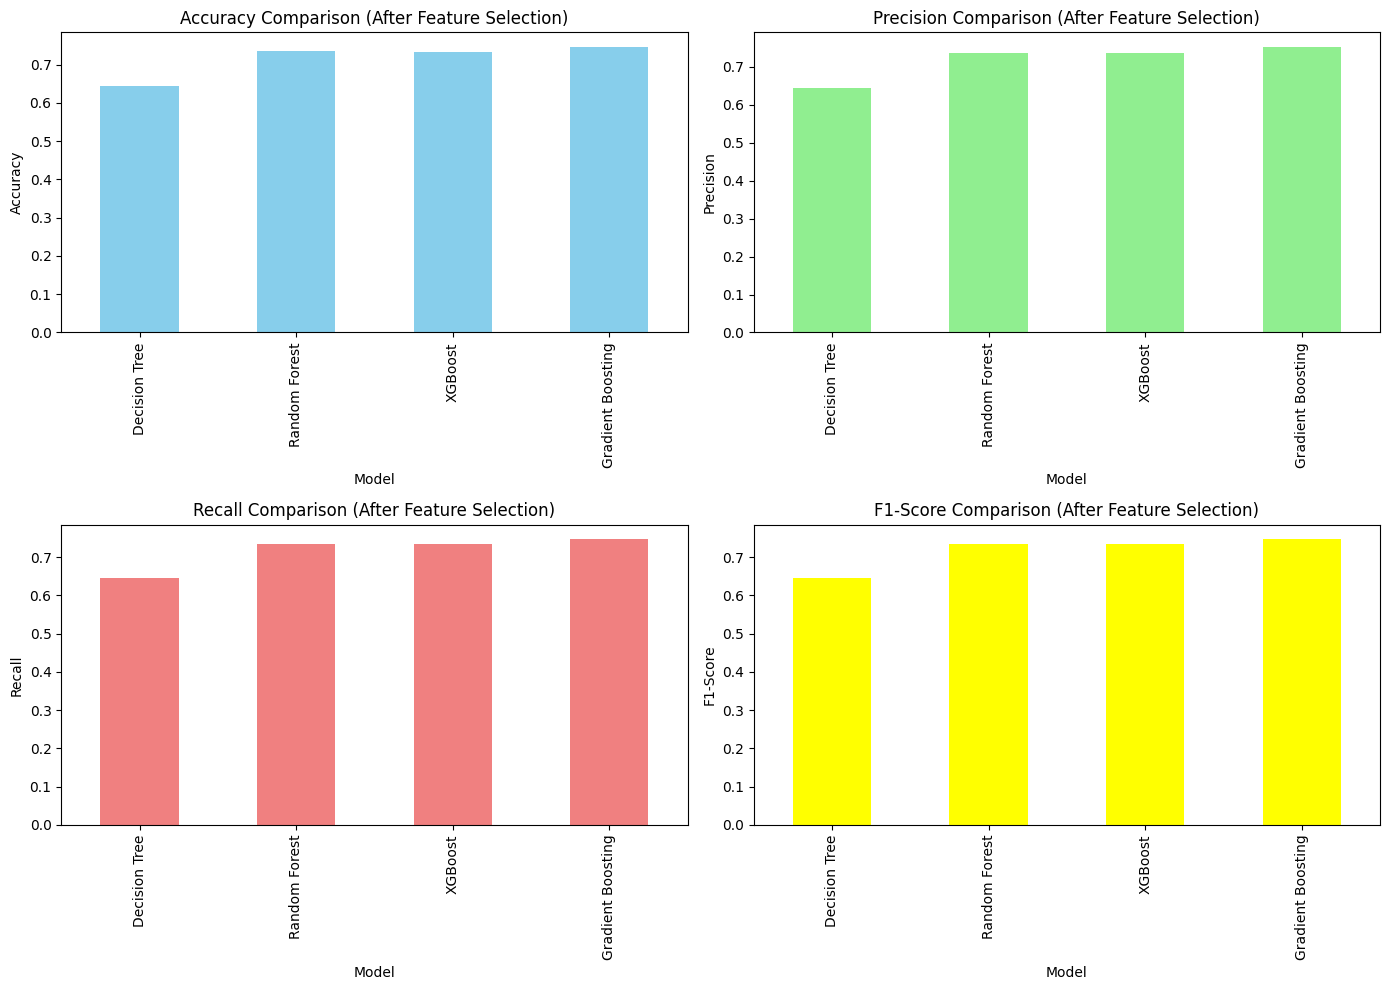

In [ ]:
# Plot the metrics for comparison after feature selection
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Accuracy Bar Plot
results_df_selected.set_index('Model')['Accuracy'].plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Accuracy Comparison (After Feature Selection)')
axes[0, 0].set_ylabel('Accuracy')

# Precision Bar Plot
results_df_selected.set_index('Model')['Precision'].plot(kind='bar', ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Precision Comparison (After Feature Selection)')
axes[0, 1].set_ylabel('Precision')

# Recall Bar Plot
results_df_selected.set_index('Model')['Recall'].plot(kind='bar', ax=axes[1, 0], color='lightcoral')
axes[1, 0].set_title('Recall Comparison (After Feature Selection)')
axes[1, 0].set_ylabel('Recall')

# F1-Score Bar Plot
results_df_selected.set_index('Model')['F1-Score'].plot(kind='bar', ax=axes[1, 1], color='yellow')
axes[1, 1].set_title('F1-Score Comparison (After Feature Selection)')
axes[1, 1].set_ylabel('F1-Score')

plt.tight_layout()
plt.show()


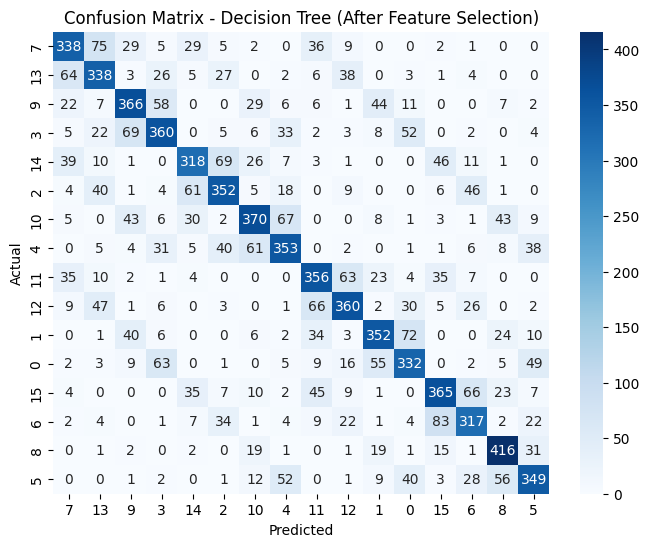

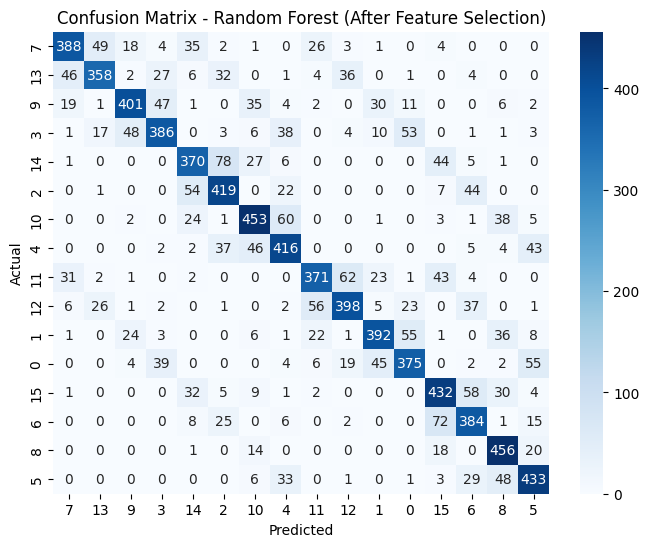

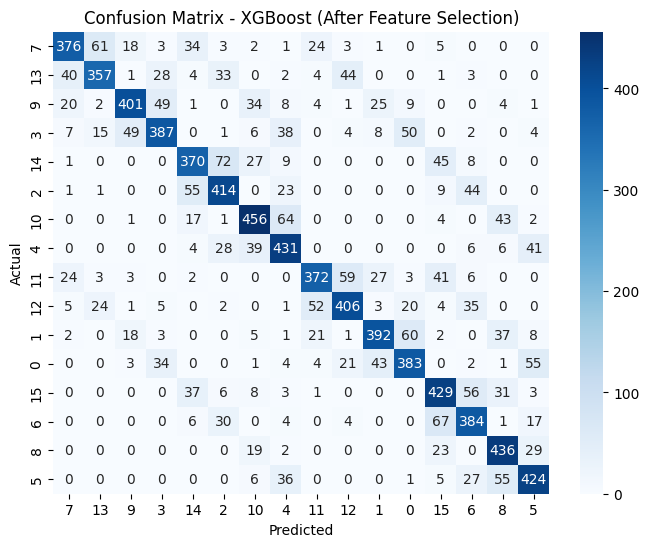

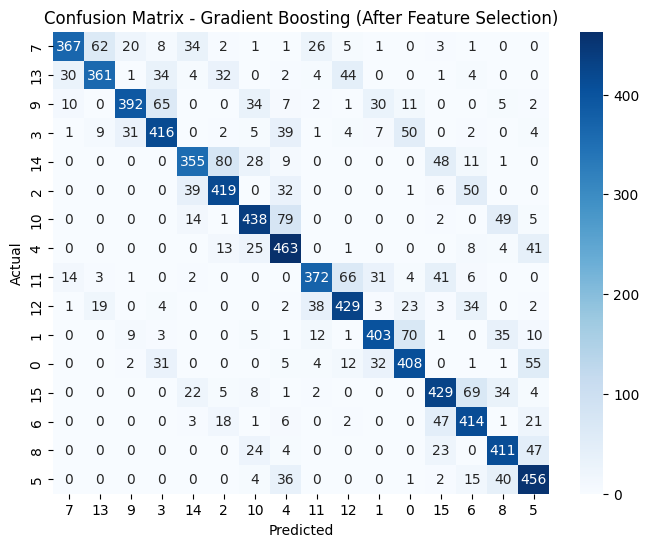

In [ ]:
# Function to plot confusion matrix
def plot_confusion_matrix_selected(y_test, y_pred, model_name):
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=y_test.unique(), yticklabels=y_test.unique())
    plt.title(f'Confusion Matrix - {model_name} (After Feature Selection)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrices for each model after feature selection
plot_confusion_matrix_selected(y_test, dt.predict(X_test_selected), 'Decision Tree')
plot_confusion_matrix_selected(y_test, rf.predict(X_test_selected), 'Random Forest')
plot_confusion_matrix_selected(y_test, xgb_model.predict(X_test_selected), 'XGBoost')
plot_confusion_matrix_selected(y_test, gbm.predict(X_test_selected), 'Gradient Boosting')


# **4. Models Tuning, Comparisons & Selection**

## **A. Tuning**

In [ ]:
X_train_no_outliers, X_test_no_outliers, y_train, y_test = train_test_split(
    X_transformed, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid_dt = {
    'max_depth': [3, 5, 10, 20],  # Max depth of the tree
    'min_samples_split': [2, 5, 10],  # Min samples required to split
    'min_samples_leaf': [1, 2, 4]  # Min samples required at leaf node
}

# Initialize the Decision Tree model
dt = DecisionTreeClassifier(random_state=42)

# Set up GridSearchCV
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=2, n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_search_dt.fit(X_train_no_outliers, y_train)

# Get the best hyperparameters and the improved accuracy score
best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

# Evaluate the model with the best hyperparameters
best_dt_model = grid_search_dt.best_estimator_
y_pred_best_dt = best_dt_model.predict(X_test_no_outliers)

# Calculate evaluation metrics
accuracy_best_dt = accuracy_score(y_test, y_pred_best_dt)
precision_best_dt = precision_score(y_test, y_pred_best_dt, average='weighted')
recall_best_dt = recall_score(y_test, y_pred_best_dt, average='weighted')
f1_best_dt = f1_score(y_test, y_pred_best_dt, average='weighted')

# Store the Decision Tree results after tuning
dt_result_tuned = {
    'Model': 'Decision Tree (Tuned)',
    'Best Hyperparameters': str(best_params_dt),
    'Accuracy': accuracy_best_dt,
    'Precision': precision_best_dt,
    'Recall': recall_best_dt,
    'F1-Score': f1_best_dt
}
dt_result_tuned

Fitting 2 folds for each of 36 candidates, totalling 72 fits


{'Model': 'Decision Tree (Tuned)',
 'Best Hyperparameters': "{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}",
 'Accuracy': 0.880557778031775,
 'Precision': 0.8819090771611314,
 'Recall': 0.880557778031775,
 'F1-Score': 0.8806168384166418}

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Set up the hyperparameters grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [10, 20, None],  # Max depth of the trees
#    'min_samples_split': [2, 5, 10],  # Min samples required to split
#    'min_samples_leaf': [1, 2, 4],  # Min samples required at leaf node
#    'class_weight': ['balanced', None]
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=2, n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_search_rf.fit(X_train_no_outliers, y_train)

# Get the best hyperparameters and the improved accuracy score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

# Evaluate the model with the best hyperparameters
best_rf_model = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test_no_outliers)

# Calculate evaluation metrics
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
precision_best_rf = precision_score(y_test, y_pred_best_rf, average='weighted')
recall_best_rf = recall_score(y_test, y_pred_best_rf, average='weighted')
f1_best_rf = f1_score(y_test, y_pred_best_rf, average='weighted')

# Store the Random Forest results after tuning
rf_result_tuned = {
    'Model': 'Random Forest (Tuned)',
    'Best Hyperparameters': str(best_params_rf),
    'Accuracy': accuracy_best_rf,
    'Precision': precision_best_rf,
    'Recall': recall_best_rf,
    'F1-Score': f1_best_rf
}

rf_result_tuned

Fitting 2 folds for each of 9 candidates, totalling 18 fits


{'Model': 'Random Forest (Tuned)',
 'Best Hyperparameters': "{'max_depth': None, 'n_estimators': 300}",
 'Accuracy': 0.9031889358783861,
 'Precision': 0.9043153585909328,
 'Recall': 0.9031889358783861,
 'F1-Score': 0.9032183439747398}

In [ ]:
# Set up the hyperparameters grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.2],  # Step size
#    'max_depth': [3, 5, 7],  # Maximum depth of the trees
#    'subsample': [0.6, 0.8, 1.0],  # Fraction of samples to use for fitting
#    'colsample_bytree': [0.6, 0.8, 1.0]  # Fraction of features to use for each tree
}

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Set up GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_search_xgb.fit(X_train_no_outliers, y_train)

# Get the best hyperparameters and the improved accuracy score
best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = grid_search_xgb.best_score_

# Evaluate the model with the best hyperparameters
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_best_xgb = best_xgb_model.predict(X_test_no_outliers)

# Calculate evaluation metrics
accuracy_best_xgb = accuracy_score(y_test, y_pred_best_xgb)
precision_best_xgb = precision_score(y_test, y_pred_best_xgb, average='weighted')
recall_best_xgb = recall_score(y_test, y_pred_best_xgb, average='weighted')
f1_best_xgb = f1_score(y_test, y_pred_best_xgb, average='weighted')

# Store the XGBoost results after tuning
xgb_result_tuned = {
    'Model': 'XGBoost (Tuned)',
    'Best Hyperparameters': str(best_params_xgb),
    'Accuracy': accuracy_best_xgb,
    'Precision': precision_best_xgb,
    'Recall': recall_best_xgb,
    'F1-Score': f1_best_xgb
}
xgb_result_tuned

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:44:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


{'Model': 'XGBoost (Tuned)',
 'Best Hyperparameters': "{'learning_rate': 0.1, 'n_estimators': 100}",
 'Accuracy': 0.9021602468853583,
 'Precision': 0.9032331365809076,
 'Recall': 0.9021602468853583,
 'F1-Score': 0.9021702836999529}

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
# Set up the hyperparameters grid for Gradient Boosting
param_grid_gbm = {
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.2],  # Step size
#    'max_depth': [3, 5, 7],  # Maximum depth of the trees
#    'subsample': [0.6, 0.8, 1.0]  # Fraction of samples to use for fitting
}

# Initialize Gradient Boosting model
gbm = GradientBoostingClassifier(random_state=42)

# Set up GridSearchCV
grid_search_gbm = GridSearchCV(estimator=gbm, param_grid=param_grid_gbm, cv=2, n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_search_gbm.fit(X_train_no_outliers, y_train)

# Get the best hyperparameters and the improved accuracy score
best_params_gbm = grid_search_gbm.best_params_
best_score_gbm = grid_search_gbm.best_score_

# Evaluate the model with the best hyperparameters
best_gbm_model = grid_search_gbm.best_estimator_
y_pred_best_gbm = best_gbm_model.predict(X_test_no_outliers)

# Calculate evaluation metrics
accuracy_best_gbm = accuracy_score(y_test, y_pred_best_gbm)
precision_best_gbm = precision_score(y_test, y_pred_best_gbm, average='weighted')
recall_best_gbm = recall_score(y_test, y_pred_best_gbm, average='weighted')
f1_best_gbm = f1_score(y_test, y_pred_best_gbm, average='weighted')

# Store the Gradient Boosting results after tuning
gbm_result_tuned = {
    'Model': 'Gradient Boosting (Tuned)',
    'Best Hyperparameters': str(best_params_gbm),
    'Accuracy': accuracy_best_gbm,
    'Precision': precision_best_gbm,
    'Recall': recall_best_gbm,
    'F1-Score': f1_best_gbm
}
gbm_result_tuned

Fitting 2 folds for each of 9 candidates, totalling 18 fits


{'Model': 'Gradient Boosting (Tuned)',
 'Best Hyperparameters': "{'learning_rate': 0.1, 'n_estimators': 200}",
 'Accuracy': 0.9018173505543491,
 'Precision': 0.9025593924176903,
 'Recall': 0.9018173505543491,
 'F1-Score': 0.9018215362382115}

In [ ]:
# Collect all tuned results into a list
results_list_tuned = [
    dt_result_tuned,
    rf_result_tuned,
    xgb_result_tuned,
    gbm_result_tuned
]

# Convert the list of results into a DataFrame
results_df_tuned = pd.DataFrame(results_list_tuned)

# Display the results
results_df_tuned


,Model,Best Hyperparameters,Accuracy,Precision,Recall,F1-Score
0,Decision Tree (Tuned),"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",0.880558,0.881909,0.880558,0.880617
1,Random Forest (Tuned),"{'max_depth': None, 'n_estimators': 300}",0.903189,0.904315,0.903189,0.903218
2,XGBoost (Tuned),"{'learning_rate': 0.1, 'n_estimators': 100}",0.902160,0.903233,0.902160,0.902170
3,Gradient Boosting (Tuned),"{'learning_rate': 0.1, 'n_estimators': 200}",0.901817,0.902559,0.901817,0.901822


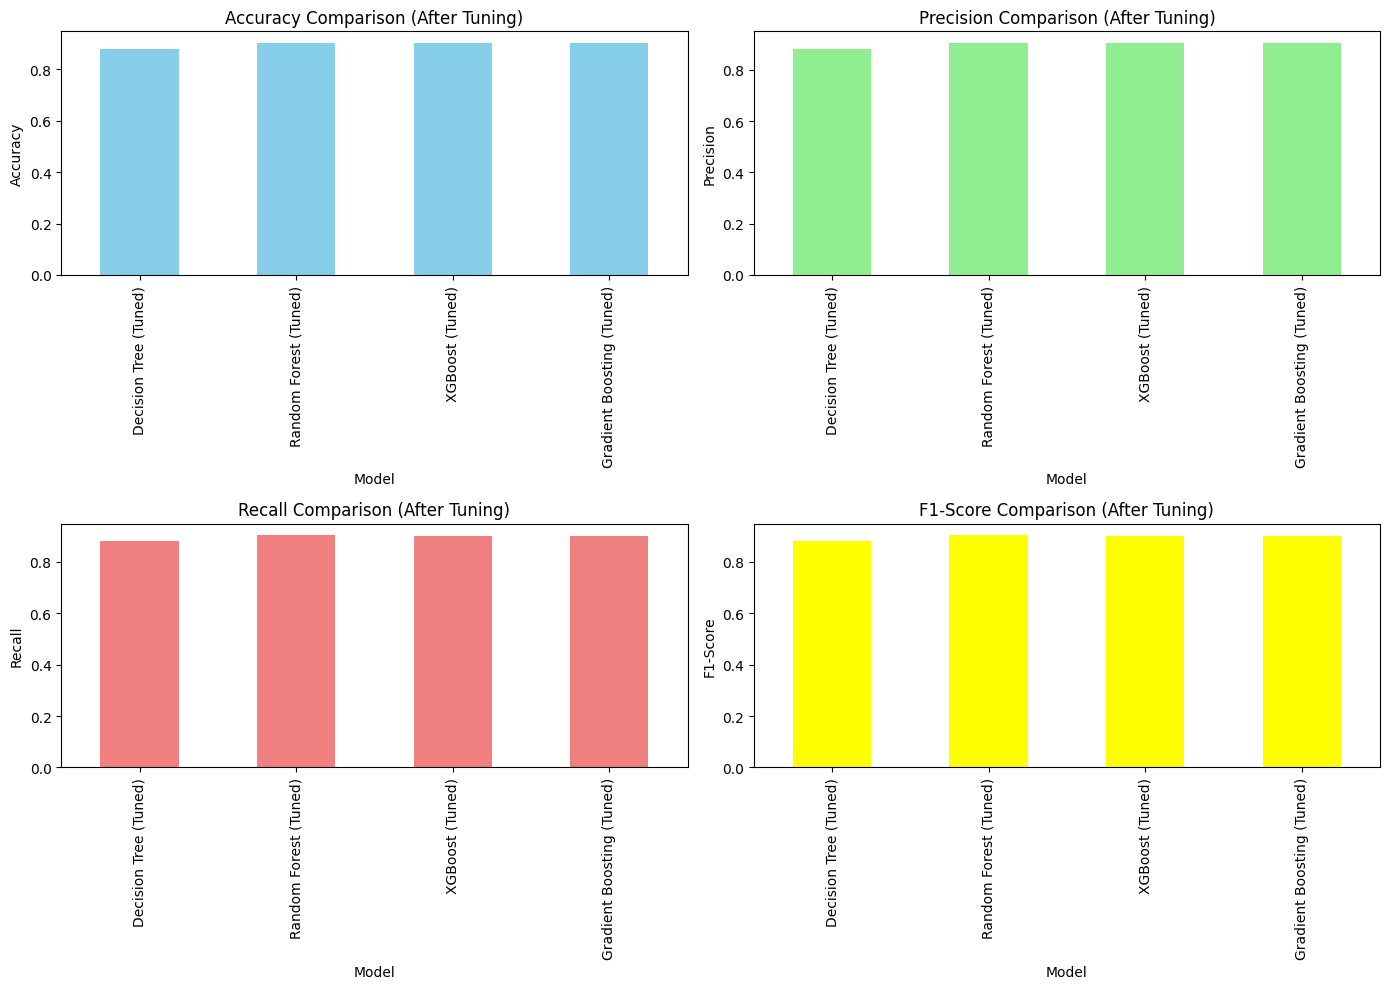

In [ ]:
# Plot the metrics for comparison after tuning
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Accuracy Bar Plot
results_df_tuned.set_index('Model')['Accuracy'].plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Accuracy Comparison (After Tuning)')
axes[0, 0].set_ylabel('Accuracy')

# Precision Bar Plot
results_df_tuned.set_index('Model')['Precision'].plot(kind='bar', ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Precision Comparison (After Tuning)')
axes[0, 1].set_ylabel('Precision')

# Recall Bar Plot
results_df_tuned.set_index('Model')['Recall'].plot(kind='bar', ax=axes[1, 0], color='lightcoral')
axes[1, 0].set_title('Recall Comparison (After Tuning)')
axes[1, 0].set_ylabel('Recall')

# F1-Score Bar Plot
results_df_tuned.set_index('Model')['F1-Score'].plot(kind='bar', ax=axes[1, 1], color='yellow')
axes[1, 1].set_title('F1-Score Comparison (After Tuning)')
axes[1, 1].set_ylabel('F1-Score')

# Adjust layout to make sure everything fits
plt.tight_layout()
plt.show()


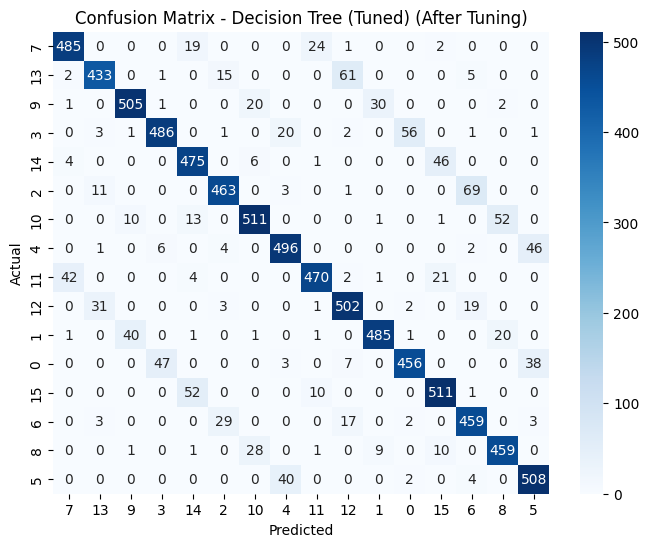

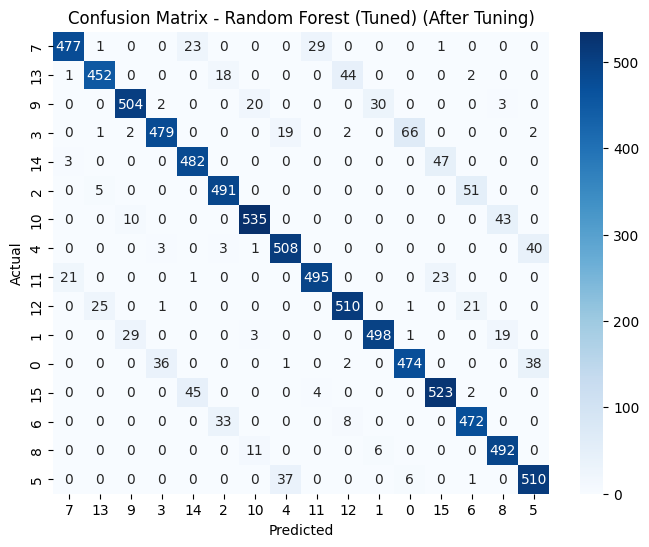

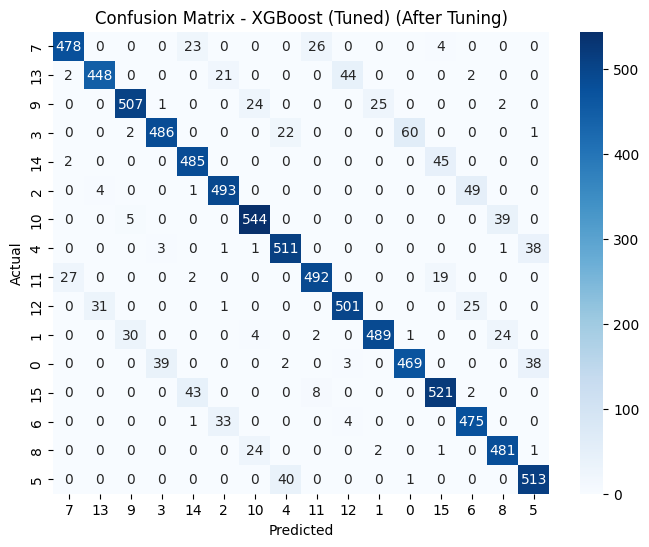

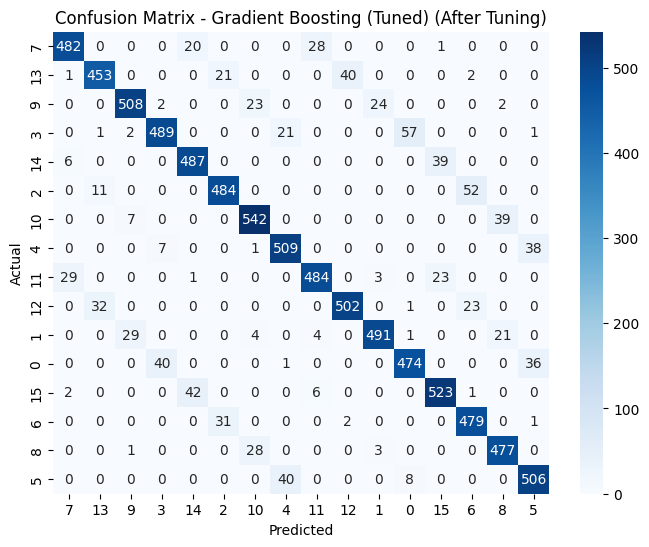

In [ ]:
# Function to plot confusion matrix after tuning
def plot_confusion_matrix_tuned(y_test, y_pred, model_name):
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=y_test.unique(), yticklabels=y_test.unique())
    plt.title(f'Confusion Matrix - {model_name} (After Tuning)')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plot confusion matrices for each tuned model
plot_confusion_matrix_tuned(y_test, best_dt_model.predict(X_test_no_outliers), 'Decision Tree (Tuned)')
plot_confusion_matrix_tuned(y_test, best_rf_model.predict(X_test_no_outliers), 'Random Forest (Tuned)')
plot_confusion_matrix_tuned(y_test, best_xgb_model.predict(X_test_no_outliers), 'XGBoost (Tuned)')
plot_confusion_matrix_tuned(y_test, best_gbm_model.predict(X_test_no_outliers), 'Gradient Boosting (Tuned)')


## **B. All Models Comparisons & Best Model**

In [ ]:
# Combine results from all stages
all_results = [
    dt_result,
    rf_result,
    xgb_result,
    gbm_result,
    dt_result_no_outliers,
    rf_result_no_outliers,
    xgb_result_no_outliers,
    gbm_result_no_outliers,
    dt_result_selected,
    rf_result_selected,
    xgb_result_selected,
    gbm_result_selected,
    dt_result_tuned,
    rf_result_tuned,
    xgb_result_tuned,
    gbm_result_tuned
]

# Convert into DataFrame
results_df_all = pd.DataFrame(all_results)

# Display the comprehensive table
results_df_all


,Model,Accuracy,Precision,Recall,F1-Score,Best Hyperparameters
0,Decision Tree,0.862041,0.862336,0.862041,0.862038,NaN
1,Random Forest,0.901817,0.902844,0.901817,0.901835,NaN
2,XGBoost,0.893588,0.894362,0.893588,0.893595,NaN
3,Gradient Boosting,0.903075,0.904046,0.903075,0.903084,NaN
4,Decision Tree,0.862270,0.862550,0.862270,0.862262,NaN
5,Random Forest,0.901817,0.902882,0.901817,0.901828,NaN
6,XGBoost,0.891416,0.892287,0.891416,0.891450,NaN
7,Gradient Boosting,0.902732,0.903678,0.902732,0.902744,NaN
8,Decision Tree,0.644874,0.644999,0.644874,0.644429,NaN
9,Random Forest,0.735170,0.737887,0.735170,0.734808,NaN


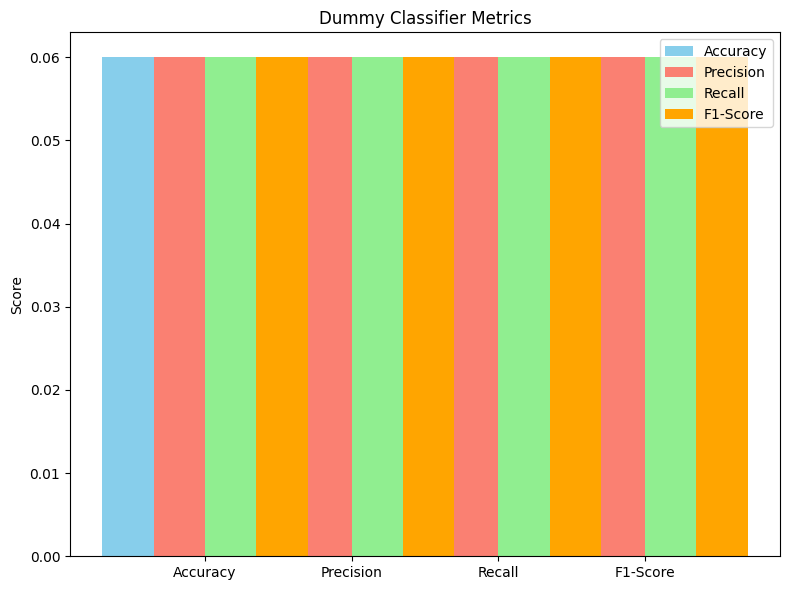

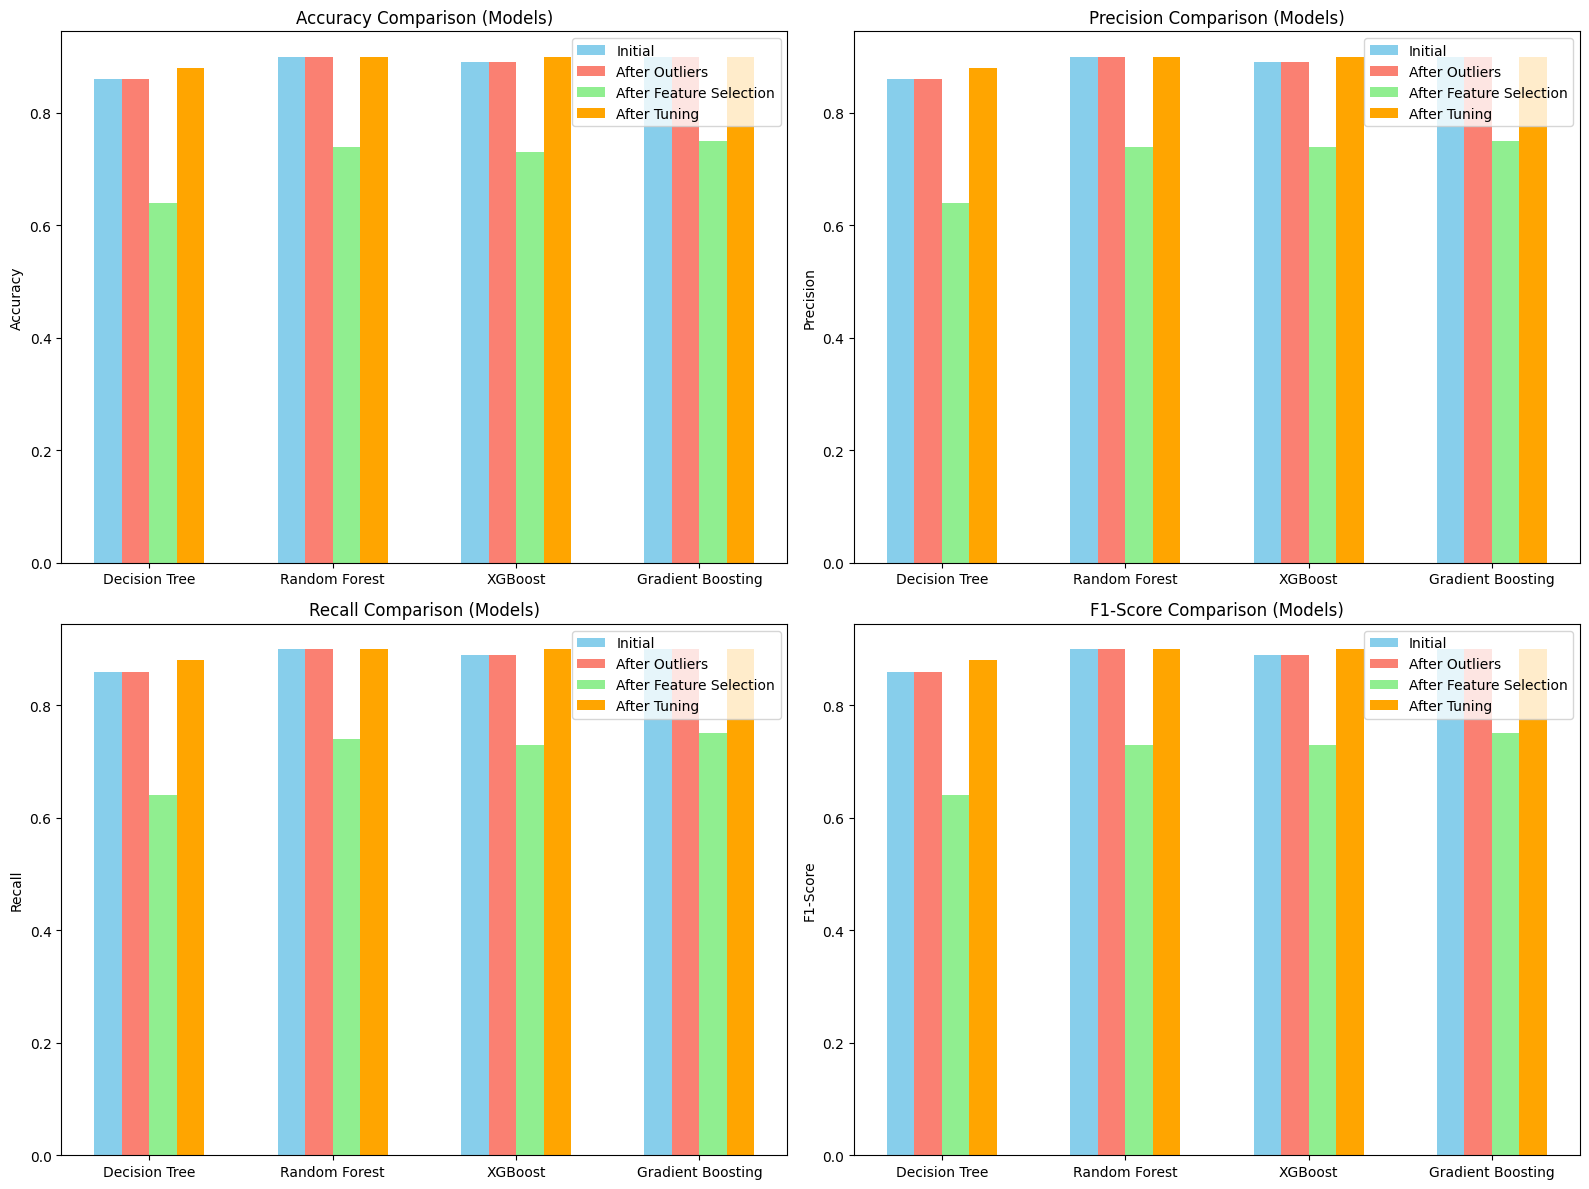

<Figure size 640x480 with 0 Axes>

In [ ]:
# Define the metrics and models
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
models = ['Decision Tree', 'Random Forest', 'XGBoost', 'Gradient Boosting']
dummy_model = ['Dummy Classifier']

initial = [
    [0.86, 0.86, 0.86, 0.86],   # Decision Tree
    [0.9, 0.9, 0.9, 0.9],   # Random Forest
    [0.89, 0.89, 0.89, 0.89],   # XGBoost
    [0.9, 0.9, 0.9, 0.9],  # Gradient Boosting
    [0.06, 0.06, 0.06, 0.06],   # Dummy Classifier
]

after_outliers = [
    [0.86, 0.86, 0.86, 0.86],  # Decision Tree
    [0.9, 0.9, 0.9, 0.9],  # Random Forest
    [0.89, 0.89, 0.89, 0.89],  # XGBoost
    [0.9, 0.9, 0.9, 0.9],   # Gradient Boosting
]

after_feature_selection = [
    [0.64, 0.64, 0.64, 0.64],  # Decision Tree
    [0.74, 0.74, 0.74, 0.73],  # Random Forest
    [0.73, 0.74, 0.73, 0.73], # XGBoost
    [0.75, 0.75, 0.75, 0.75],  # Gradient Boosting
]

after_tuning = [
    [0.88, 0.88, 0.88, 0.88],  # Decision Tree
    [0.9, 0.9, 0.9, 0.9],  # Random Forest
    [0.9, 0.9, 0.9, 0.9],  # XGBoost
    [0.9, 0.9, 0.9, 0.9], # Gradient Boosting
]

# First Plot: Compare all metrics for the Dummy Classifier in one plot
fig, ax = plt.subplots(figsize=(8, 6))

# Set positions for the bars
index = np.arange(len(metrics))
bar_width = 0.35

# Plot the Dummy Classifier for all metrics
ax.bar(index, [x[0] for x in initial[-1:]], bar_width, label='Accuracy', color='skyblue')
ax.bar(index + bar_width, [x[1] for x in initial[-1:]], bar_width, label='Precision', color='salmon')
ax.bar(index + 2 * bar_width, [x[2] for x in initial[-1:]], bar_width, label='Recall', color='lightgreen')
ax.bar(index + 3 * bar_width, [x[3] for x in initial[-1:]], bar_width, label='F1-Score', color='orange')

ax.set_title('Dummy Classifier Metrics')
ax.set_xticks(index + 1.5 * bar_width)
ax.set_xticklabels(metrics)
ax.set_ylabel('Score')
ax.legend()

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

bar_width = 0.15
index = np.arange(len(models))

# Accuracy plot (Models across all stages)
axes[0, 0].bar(index, [x[0] for x in initial[:-1]], bar_width, label='Initial', color='skyblue')
axes[0, 0].bar(index + bar_width, [x[0] for x in after_outliers], bar_width, label='After Outliers', color='salmon')
axes[0, 0].bar(index + 2 * bar_width, [x[0] for x in after_feature_selection], bar_width, label='After Feature Selection', color='lightgreen')
axes[0, 0].bar(index + 3 * bar_width, [x[0] for x in after_tuning], bar_width, label='After Tuning', color='orange')
axes[0, 0].set_title('Accuracy Comparison (Models)')
axes[0, 0].set_xticks(index + 1.5 * bar_width)
axes[0, 0].set_xticklabels(models)
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].legend()

# Precision plot (Models across all stages)
axes[0, 1].bar(index, [x[1] for x in initial[:-1]], bar_width, label='Initial', color='skyblue')
axes[0, 1].bar(index + bar_width, [x[1] for x in after_outliers], bar_width, label='After Outliers', color='salmon')
axes[0, 1].bar(index + 2 * bar_width, [x[1] for x in after_feature_selection], bar_width, label='After Feature Selection', color='lightgreen')
axes[0, 1].bar(index + 3 * bar_width, [x[1] for x in after_tuning], bar_width, label='After Tuning', color='orange')
axes[0, 1].set_title('Precision Comparison (Models)')
axes[0, 1].set_xticks(index + 1.5 * bar_width)
axes[0, 1].set_xticklabels(models)
axes[0, 1].set_ylabel('Precision')
axes[0, 1].legend()

# Recall plot (Models across all stages)
axes[1, 0].bar(index, [x[2] for x in initial[:-1]], bar_width, label='Initial', color='skyblue')
axes[1, 0].bar(index + bar_width, [x[2] for x in after_outliers], bar_width, label='After Outliers', color='salmon')
axes[1, 0].bar(index + 2 * bar_width, [x[2] for x in after_feature_selection], bar_width, label='After Feature Selection', color='lightgreen')
axes[1, 0].bar(index + 3 * bar_width, [x[2] for x in after_tuning], bar_width, label='After Tuning', color='orange')
axes[1, 0].set_title('Recall Comparison (Models)')
axes[1, 0].set_xticks(index + 1.5 * bar_width)
axes[1, 0].set_xticklabels(models)
axes[1, 0].set_ylabel('Recall')
axes[1, 0].legend()

# F1-Score plot (Models across all stages)
axes[1, 1].bar(index, [x[3] for x in initial[:-1]], bar_width, label='Initial', color='skyblue')
axes[1, 1].bar(index + bar_width, [x[3] for x in after_outliers], bar_width, label='After Outliers', color='salmon')
axes[1, 1].bar(index + 2 * bar_width, [x[3] for x in after_feature_selection], bar_width, label='After Feature Selection', color='lightgreen')
axes[1, 1].bar(index + 3 * bar_width, [x[3] for x in after_tuning], bar_width, label='After Tuning', color='orange')
axes[1, 1].set_title('F1-Score Comparison (Models)')
axes[1, 1].set_xticks(index + 1.5 * bar_width)
axes[1, 1].set_xticklabels(models)
axes[1, 1].set_ylabel('F1-Score')
axes[1, 1].legend()

plt.tight_layout()
plt.show()
plt.savefig('models_comparison.png')

## **Best Model: Random Forest 0.903189 (After Tuning)**